# Hamming distance histograms

Local and global Hamming distance superimposed. 
- Local: the surface of the neutral space 
- Global: the total genotypes in the map

No deleterious ignores the gneotypes of phenotype '.'*L

In [1]:
import pickle 
with open("../data/hammingglobalDPD_nodel.pkl","rb") as f:
    hammingglobalDPD = pickle.load(f)
with open("../data/hamminglocalDPD_nodel.pkl","rb") as f:
    hamminglocalDPD = pickle.load(f)
with open("../data/edgeD.pkl","rb") as f:
    edgeD = pickle.load(f)
with open("../data/neutralsets.pkl","rb") as f:
    neutralsets = pickle.load(f)
L=12
K=4

In [5]:
len(neutralsets)

48

In [2]:
from collections import defaultdict
sort_neutralsets = defaultdict(float)
sorted_neutralsets = dict(sorted(neutralsets.items(), key=lambda item: item[1], reverse=True))
for k, v in sorted_neutralsets.items():
    k = k.replace('\n', '')
    sort_neutralsets[k] = v

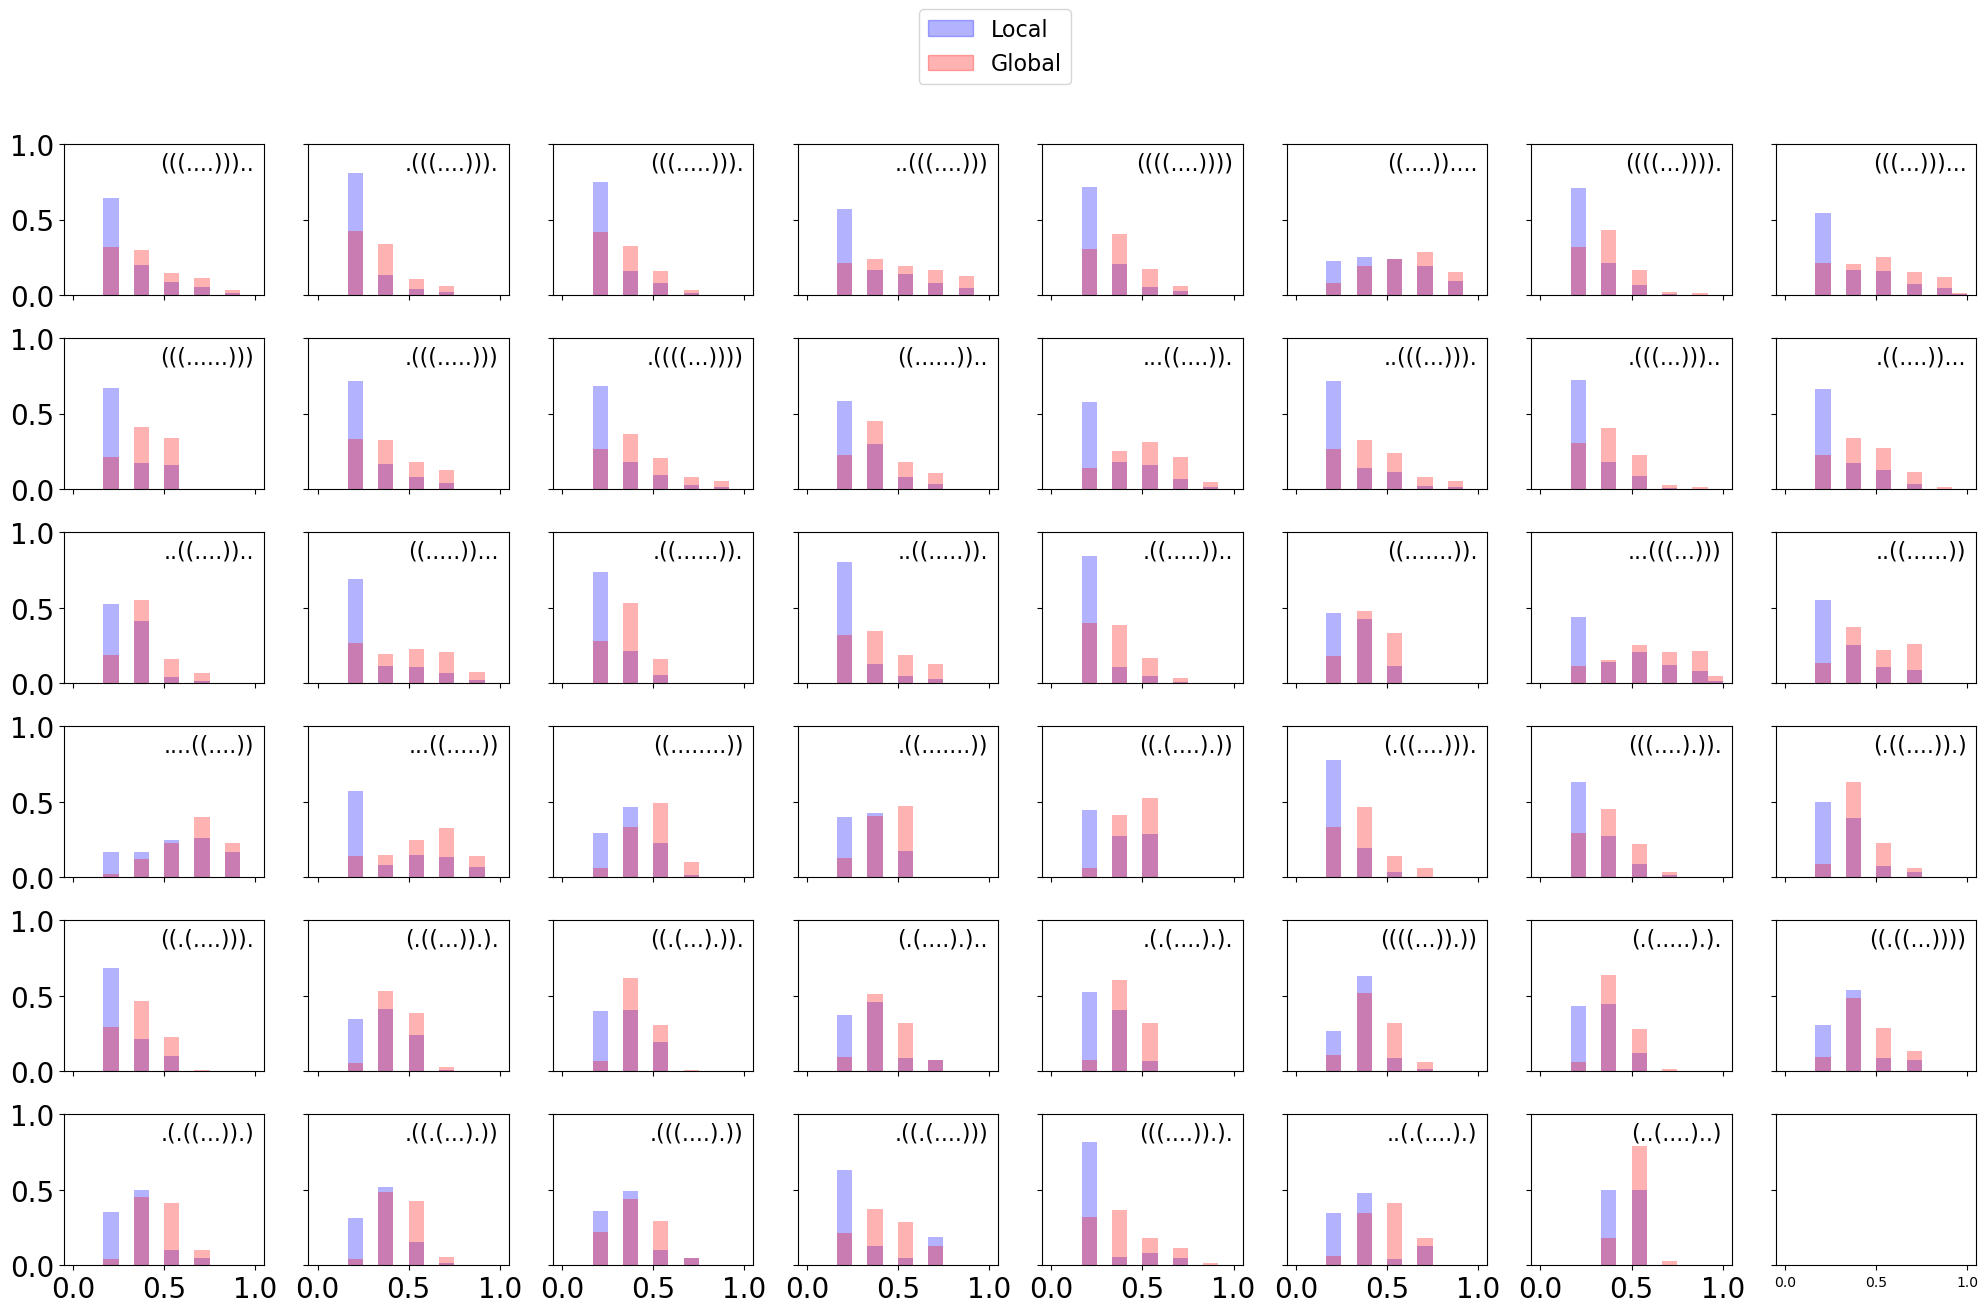

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig, axs = plt.subplots(6, 8, figsize=(20, 12), sharex=True, sharey=True)  # 5 rows, 8 columns

bins = np.linspace(0, 1, L+1)
freqlist = defaultdict(list)

for i, ax in enumerate(axs.flatten()):
    if i < len(hamminglocalDPD):
        key = list(sort_neutralsets.keys())[i+1]

        h_values = list(hamminglocalDPD[key].keys())
        counts = list(hamminglocalDPD[key].values())
        
        for i,j in zip(h_values,counts):
            i*=12
            freqlist[i].append(j/edgeD[key])

        ax.hist(h_values, bins=bins, weights=np.array(counts)/(edgeD[key]), color='blue', alpha=0.3)
        
        h_values1 = list(hammingglobalDPD[key].keys())
        counts1 = np.array(list(hammingglobalDPD[key].values()))/np.sum(list(sort_neutralsets.values())[1:])
        
        ax.hist(h_values1, bins=bins, weights=np.array(counts1), color='red', alpha=0.3)
        
        ax.text(0.95, 0.95, key, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=16)
        ax.set_yticks([0.0,0.5,1.0])
        ax.set_xticks([0.0,0.5,1.0])
        ax.tick_params(axis='both', which='major', labelsize=20)  # Set tick label size


blue_patch = mpatches.Patch(color='blue', alpha=0.3, label='Local')
red_patch = mpatches.Patch(color='red', alpha=0.3, label='Global')
fig.legend(handles=[blue_patch, red_patch], loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=16)
plt.tight_layout()
plt.savefig("hamming.png", bbox_inches='tight')
plt.show()

## Combined

[0.6405799811988444, 0.05347796770335517, 0.015083251714005876, 0.08908991578854114, 0.20176888359525344, 0.8104640309416062, 0.01903203149307037, 0.040364935081871924, 0.13013900248345142, 0.7486968087045367, 0.15765672405047998, 0.013052222429367292, 0.080594244815616, 0.567350214660285, 0.16404271490238312, 0.13830108782730924, 0.08073310228863372, 0.04957288032138885, 0.7175279717276588, 0.20255385382428664, 0.05596649886772374, 0.023951675580330862, 0.2275120316945412, 0.09200989124943497, 0.19047834294982585, 0.2389640777473477, 0.2510356563588503, 0.7117626780451165, 0.06789857107307641, 0.20963720917490258, 0.007346679725401294, 0.0033548619815031698, 0.5462178562556209, 0.1599517783653559, 0.0737440517342649, 0.04796357957051162, 0.005045554423622438, 0.16707717965062424, 0.6710489269735124, 0.15815962572812772, 0.17079144729835985, 0.7145543508937716, 0.16386606585085095, 0.07895062296059287, 0.04262896029478451, 0.6822580360348695, 0.17655290745242538, 0.09397643194754284, 0

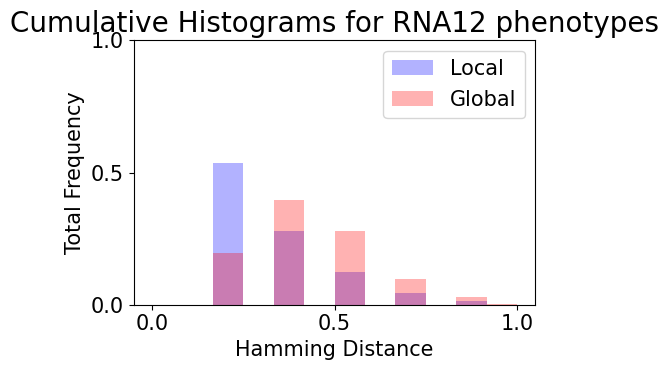

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from collections import defaultdict, OrderedDict

fig, ax = plt.subplots(figsize=(5, 4))


bins = np.linspace(0, 1, 13)  # Assuming L = 12

# Initialize lists to aggregate data
all_local_h_values = []
all_local_counts = []
all_global_h_values = []
all_global_counts = []

# Process data and aggregate for cumulative histograms
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    # Local Hamming distances
    h_values_local = list(hamminglocalDPD[key].keys())
    counts_local = list(hamminglocalDPD[key].values())
    all_local_h_values.extend(h_values_local)
    all_local_counts.extend(np.array(counts_local) / edgeD[key])

    # Global Hamming distances
    h_values_global = list(hammingglobalDPD[key].keys())
    counts_global = np.array(list(hammingglobalDPD[key].values())) / np.sum(list(sort_neutralsets.values())[1:])
    all_global_h_values.extend(h_values_global)
    all_global_counts.extend(counts_global)

# Normalize the counts
print(all_local_counts)
total_local_counts = np.sum(all_local_counts)

total_global_counts = np.sum(all_global_counts)
normalized_local_counts = np.array(all_local_counts) / total_local_counts
normalized_global_counts = np.array(all_global_counts) / total_global_counts

# Plot the cumulative histograms
ax.hist(all_local_h_values, bins=bins, weights=normalized_local_counts, color='blue', alpha=0.3, label='Local')
ax.hist(all_global_h_values, bins=bins, weights=normalized_global_counts, color='red', alpha=0.3, label='Global')

ax.set_xlabel('Hamming Distance', fontsize=15)
ax.set_ylabel('Total Frequency', fontsize=15)
ax.set_title('Cumulative Histograms for RNA12 phenotypes', fontsize=20)
#ax.set_title('Cumulative Histograms of Hamming Distances', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks([0.0, 0.5, 1.0])
ax.set_yticks([0.0, 0.5, 1.0])
plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("cumulative_histograms.png", bbox_inches='tight')
plt.show()

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


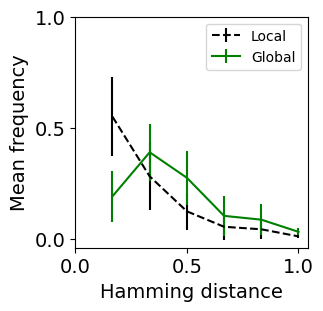

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from collections import defaultdict, OrderedDict

fig, ax = plt.subplots(figsize=(3, 3))
freqlistlocal = defaultdict(list)
freqlistglobal = defaultdict(list)
for key in list(sort_neutralsets.keys()):
        if key == '.'*L: continue

        h_values = list(hamminglocalDPD[key].keys())
        counts = list(hamminglocalDPD[key].values())
        
        for i,j in zip(h_values,counts):
            i*=12
            freqlistlocal[i].append(j/edgeD[key])
        
        h_values = list(hammingglobalDPD[key].keys())
        counts = list(hammingglobalDPD[key].values())
        
        for i,j in zip(h_values,counts):
            i*=12
            freqlistglobal[i].append(j/np.sum(list(sort_neutralsets.values())[1:]))

distavg_local = defaultdict()
diststd_local= defaultdict()
distavg_global = defaultdict()
diststd_global= defaultdict()
for dist,freq in freqlistlocal.items():
    distavg_local[dist] = np.mean(freq)
    diststd_local[dist] = np.std(freq)
for dist,freq in freqlistglobal.items():
    distavg_global[dist] = np.mean(freq)
    diststd_global[dist] = np.std(freq)
distavg_global = {k: v for k, v in sorted(distavg_global.items())}
distavg_local = {k: v for k, v in sorted(distavg_local.items())}
diststd_global = {k: v for k, v in sorted(diststd_global.items())}
diststd_local = {k: v for k, v in sorted(diststd_local.items())}

ax.errorbar(np.array(list(distavg_local.keys()))/12.,list(distavg_local.values()),yerr = list(diststd_local.values()),color= 'k', linestyle = '--',label = 'Local')
ax.errorbar(np.array(list(distavg_global.keys()))/12.,list(distavg_global.values()),yerr = list(diststd_global.values()), color = 'g', label = 'Global')
ax.set_yticks([0.0,0.5,1.0], fontsize=14)
print(np.array(list(distavg_local.keys()))/12)
#ax.set_xticks([np.round(2/12,2),np.round(4/12,2),np.round(6/12,2),np.round(8/12,2),np.round(10/12,2),np.round(12/12,1)])
ax.set_xticks([0.0,0.5,1.0]) 

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('Mean frequency', fontsize=14)

ax.set_xlabel('Hamming distance', fontsize = 14)
plt.legend()


# $\phi_{pq}$ with Hamming distance

The $\phi_{pq}$ is the probability of phenotype $q$ mutating to a phenoytpe $p$:

$\sum_p \phi_{pq}$ = 1 

We check that probabilities are higher for similar phenotypes.

Colormap divides warm to cool, with cool colours corresponding to similar phenotypes (low $H$) and  warm colours to less similar (high $H$), normalised from 0-1 with $H-0.5$ as the midpoint for the normalised colormap.

We skip the deleterious and the neutral set.

In [5]:
import pickle
with open("../data/phipq.pkl","rb") as f:
    phipq = pickle.load(f)

L=12
K=4

In [7]:
import pickle
with open("../data/phi_pq.pkl","rb") as f:
    phipq = pickle.load(f)

L=12
K=4

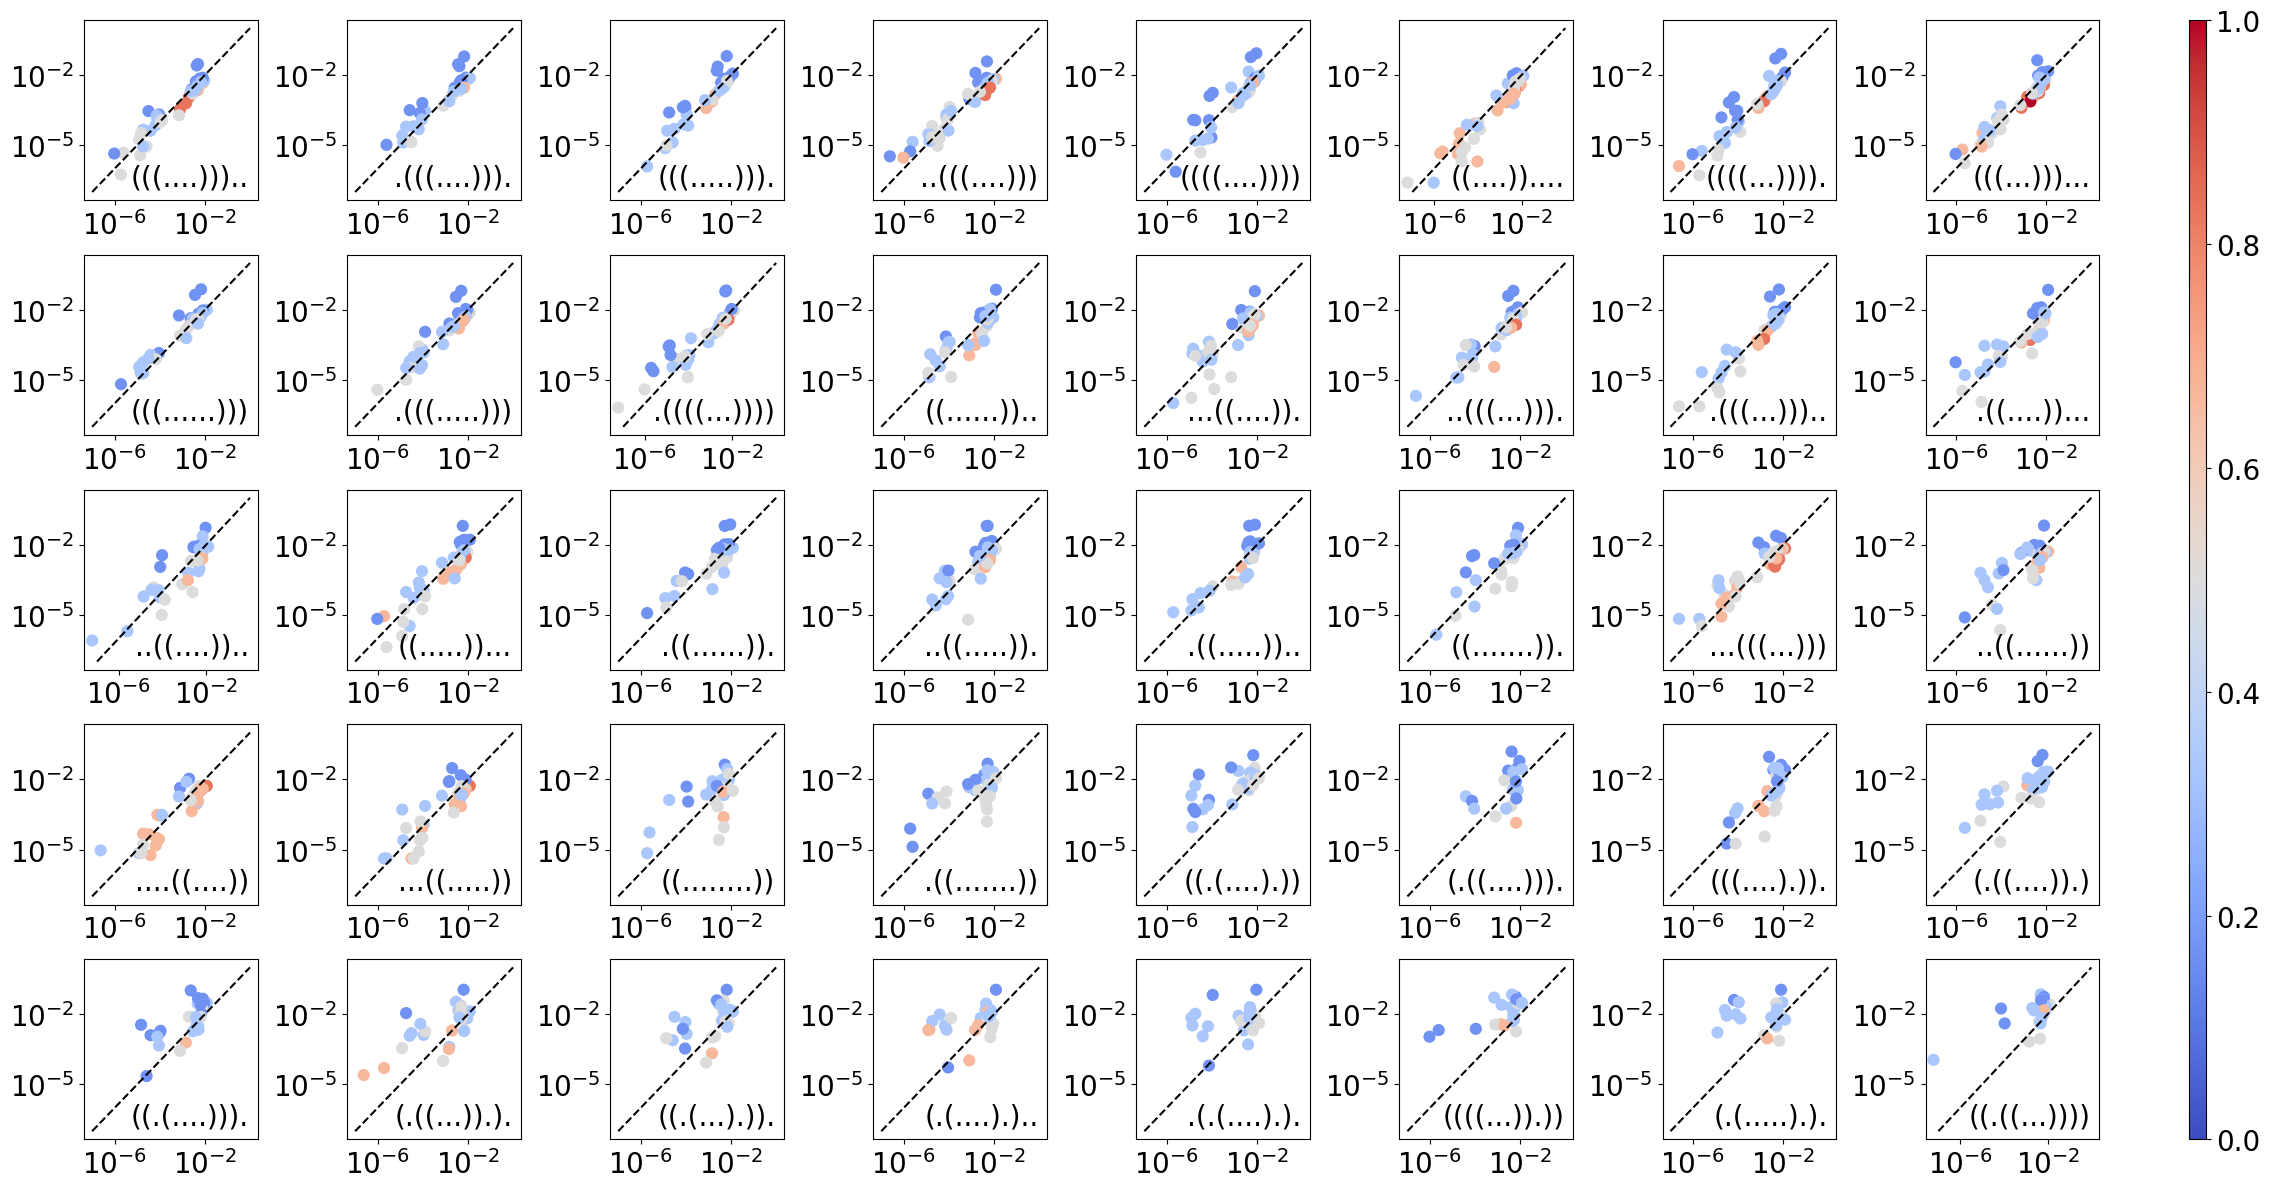

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(5, 9, figure=fig, width_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 0.1])

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

axs = [fig.add_subplot(gs[i, j]) for i in range(5) for j in range(8)]

for i, ax in enumerate(axs):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listhamming = []
        listfreq = []
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
                continue
            listphipq.append(phi)
            listhamming.append(hamming(key, q))
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
        scatter = ax.scatter(listfreq, listphipq, s=60, c=listhamming, cmap=cmap, norm=norm, alpha=1)  # Use the colormap to determine the color

        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.text(0.95, 0.05, key, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)  # Set tick label size

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_subplot(gs[:, -1])  # Create an axis for the colorbar
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the colorbar
plt.savefig("phipq.png", bbox_inches='tight')
plt.show()

## Combined

/tmp/ipykernel_2920771/2207644950.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


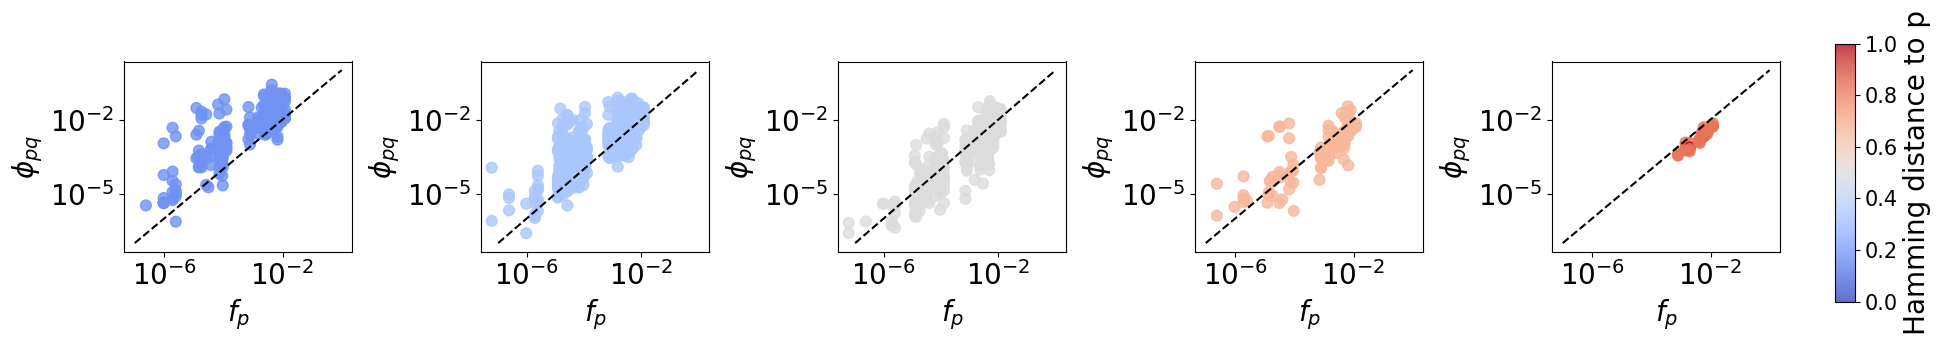

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []
phipqhamming = defaultdict(tuple)

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        hamming_dist = hamming(key, q)
        listphipq.append(phi)
        listhamming.append(hamming_dist)
        listfreq.append(neutralsets[q+'\n'] / K**L)

        # Assign to appropriate range
        if hamming_dist < 4/12:
            idx = 0
        elif hamming_dist < 6/12 and hamming_dist >= 4/12:
            idx = 1
        elif hamming_dist < 8/12 and hamming_dist >= 6/12:
            idx = 2
        elif hamming_dist < 10/12 and hamming_dist >= 8/12:
            idx = 3
            phipqhamming[(key,q)] = (phi,neutralsets[q+'\n'] / K**L)
        else:
            idx = 4

        listphipq_ranges[idx].append(phi)
        listhamming_ranges[idx].append(hamming_dist)
        listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8)
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

In [33]:
phipqhamming_sort = dict(sorted(phipqhamming.items(), key=lambda item: np.log10(item[1][0]) - np.log10(item[1][1]), reverse=True))

## Overrepresented
Ranking of the distance to diagonal to check which stuctures are the most probable. These are indeed the ones that have one less or one more base pair close to the original base pairs

/tmp/ipykernel_590374/3792204726.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar


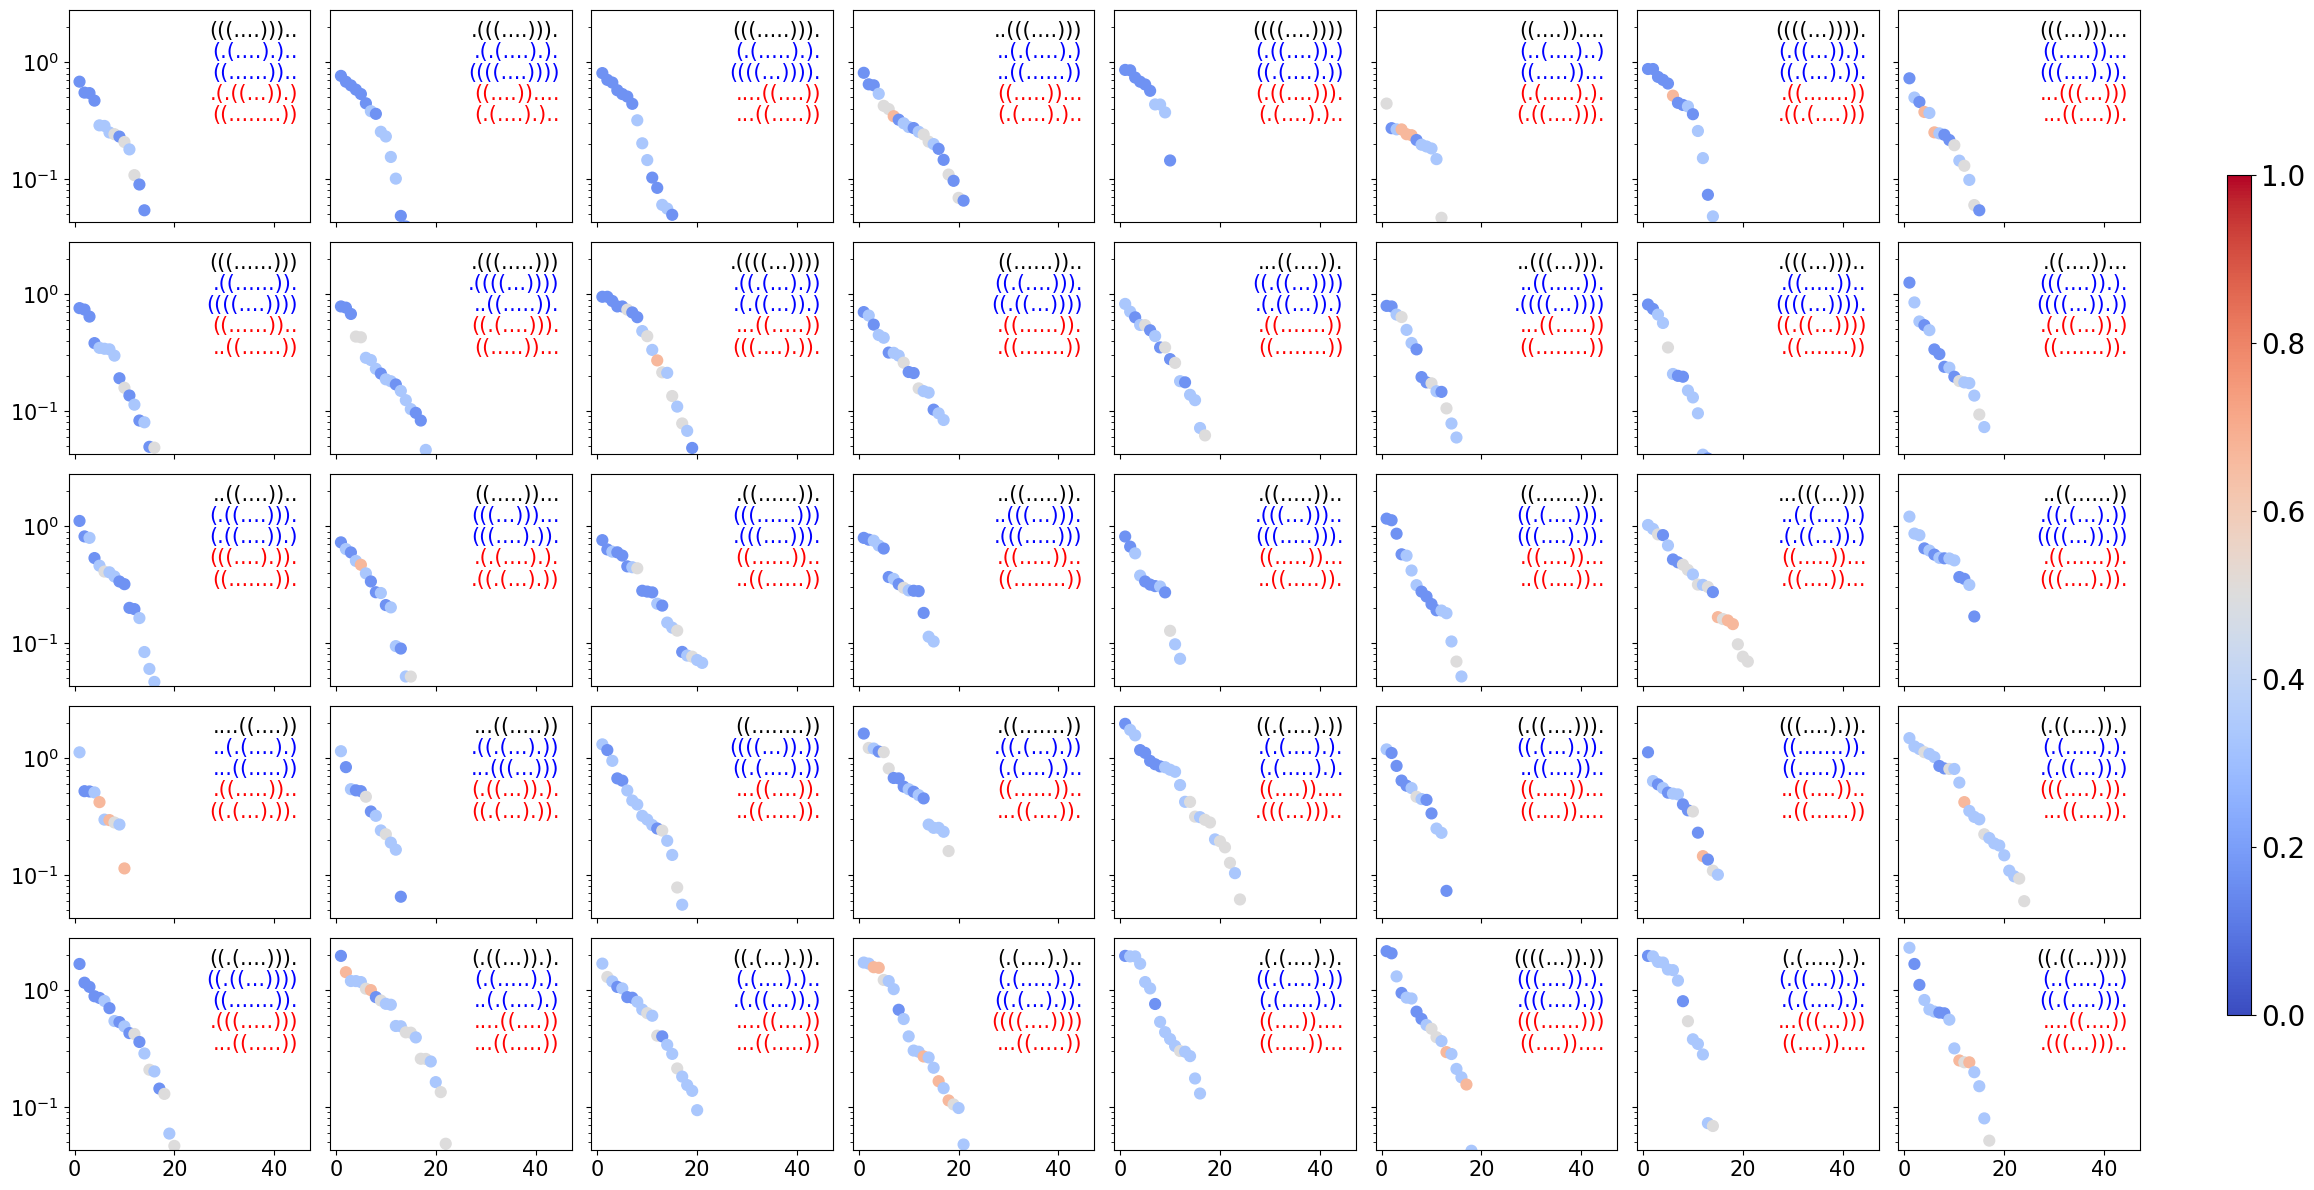

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig, axs = plt.subplots(5, 8, figsize=(24, 12), sharex=True, sharey=True)
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

for i, ax in enumerate(axs.flatten()):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listfreq = []
        distances = []
        listhamming = []
        phenos = []

        for q, phi in qitems.items():
            if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
                continue
            listphipq.append(phi)
            listfreq.append(neutralsets[q+'\n'] / K**L)
            listhamming.append(hamming(key, q))
            # Calculate the distance from the point to the diagonal y = x
            distance = (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
            distances.append(distance)
            phenos.append(q)
        
        # Get the sorted indices of distances in descending order
        sorted_indices = np.argsort(distances)[::-1]
        
        # Sort distances and listhamming based on the sorted indices
        ranked_distances = np.array(distances)[sorted_indices]
        sorted_listhamming = np.array(listhamming)[sorted_indices]
        sorted_phenos = np.array(phenos)[sorted_indices]
        
        # Plot the distance versus its ranking
        scatter = ax.scatter(np.arange(1, len(ranked_distances)+1), ranked_distances, s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
        ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.text(0.95, 0.95, key, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)
        for j in range(1,3):
            ax.text(0.95, 0.95-0.1*j, f"{sorted_phenos[j-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'blue')
        for k in range(1,3):
            ax.text(0.95, 0.95-0.1*j-0.1*k, f"{sorted_phenos[-2:][k-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'red')
# Set common labels
#fig.text(0.5, 0.04, 'Ranking', ha='center', fontsize=20)
#fig.text(0.04, 0.5, 'Distance', va='center', rotation='vertical', fontsize=20)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.7])  # Move to the right and make thinner
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar
plt.savefig("distance_ranking.png", bbox_inches='tight')
plt.show()

### combined

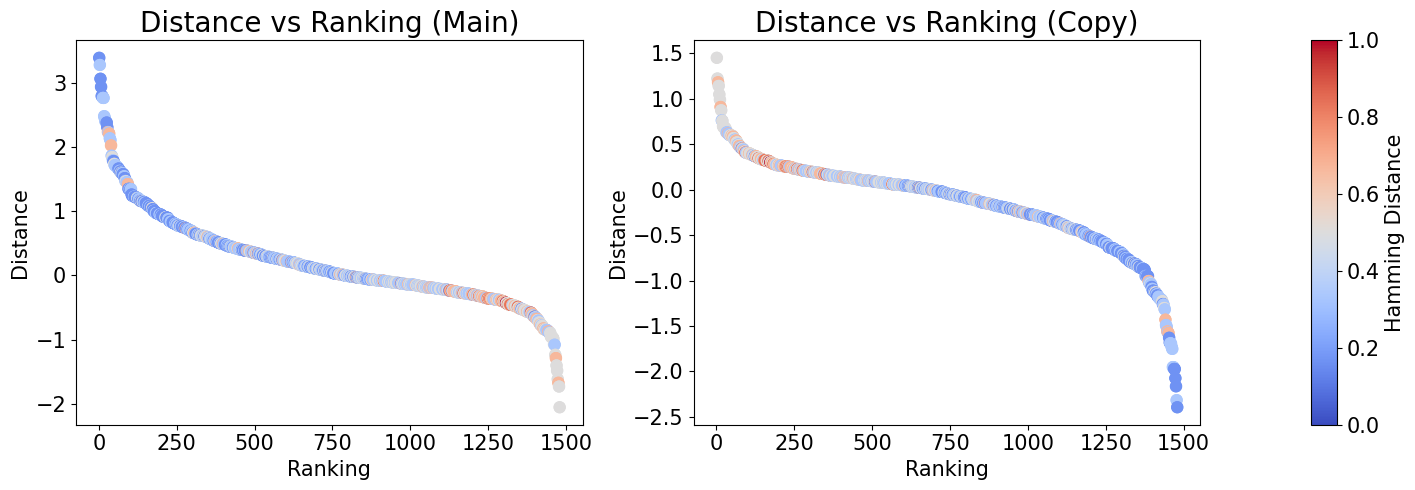

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result


# Populate your data here...

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
#cmap = plt.get_cmap('coolwarm')  # Get the colormap
#norm = MidpointNormalize(vmin=0, vmax=1, midpoint=(6/12))  # Use custom normalization
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalize from 0 to 1

listphipq = []
listfreq = []
listhamming = []
distances = []
phenos = []

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
            continue
        listphipq.append(phi)
        listfreq.append(neutralsets[q+'\n'] / K**L)
        listhamming.append(hamming(key, q))
        # Calculate the distance from the point to the diagonal y = x
        #distance = (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
        distance = (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L))
        distances.append(distance)
        phenos.append(q)


sorted_indices = np.argsort(distances)[::-1]
# Sort distances and listhamming based on the sorted indices
ranked_distances = np.array(distances)[sorted_indices]
sorted_listhamming = np.array(listhamming)[sorted_indices]
sorted_phenos = np.array(phenos)[sorted_indices]

# Create the main scatter plot
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(np.arange(1, len(ranked_distances)+1), ranked_distances, s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Ranking', fontsize=15)
ax1.set_ylabel('Distance', fontsize=15)
ax1.set_title('Distance vs Ranking (Main)', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=15)

listphipq = []
listfreq = []
listhamming = []
distances = []
phenos = []

for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
            continue
        listphipq.append(phi)
        listfreq.append(neutralsets[q+'\n'] / K**L)
        listhamming.append(hamming(key, q))
        # Calculate the distance from the point to the diagonal y = x
        if hamming(key, q) >= (2/12):
            distance = - (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
            distances.append(distance)
            phenos.append(q)


sorted_indices = np.argsort(distances)[::-1]
        
# Sort distances and listhamming based on the sorted indices
ranked_distances = np.array(distances)[sorted_indices]
sorted_listhamming = np.array(listhamming)[sorted_indices]
sorted_phenos = np.array(phenos)[sorted_indices]

# Create the copy scatter plot
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(np.arange(1, len(ranked_distances)+1), np.array(ranked_distances), s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Ranking', fontsize=15)
ax2.set_ylabel('Distance', fontsize=15)
ax2.set_title('Distance vs Ranking (Copy)', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_subplot(gs[:, 2])  # Create an axis for the colorbar
cbar = fig.colorbar(scatter1, cax=cbar_ax, orientation='vertical')
cbar.set_label('Hamming Distance', fontsize=15)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the colorbar
plt.savefig("distance_ranking_combined.png", bbox_inches='tight')
plt.show()

## Underrepresented

/tmp/ipykernel_2508361/1200960788.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar


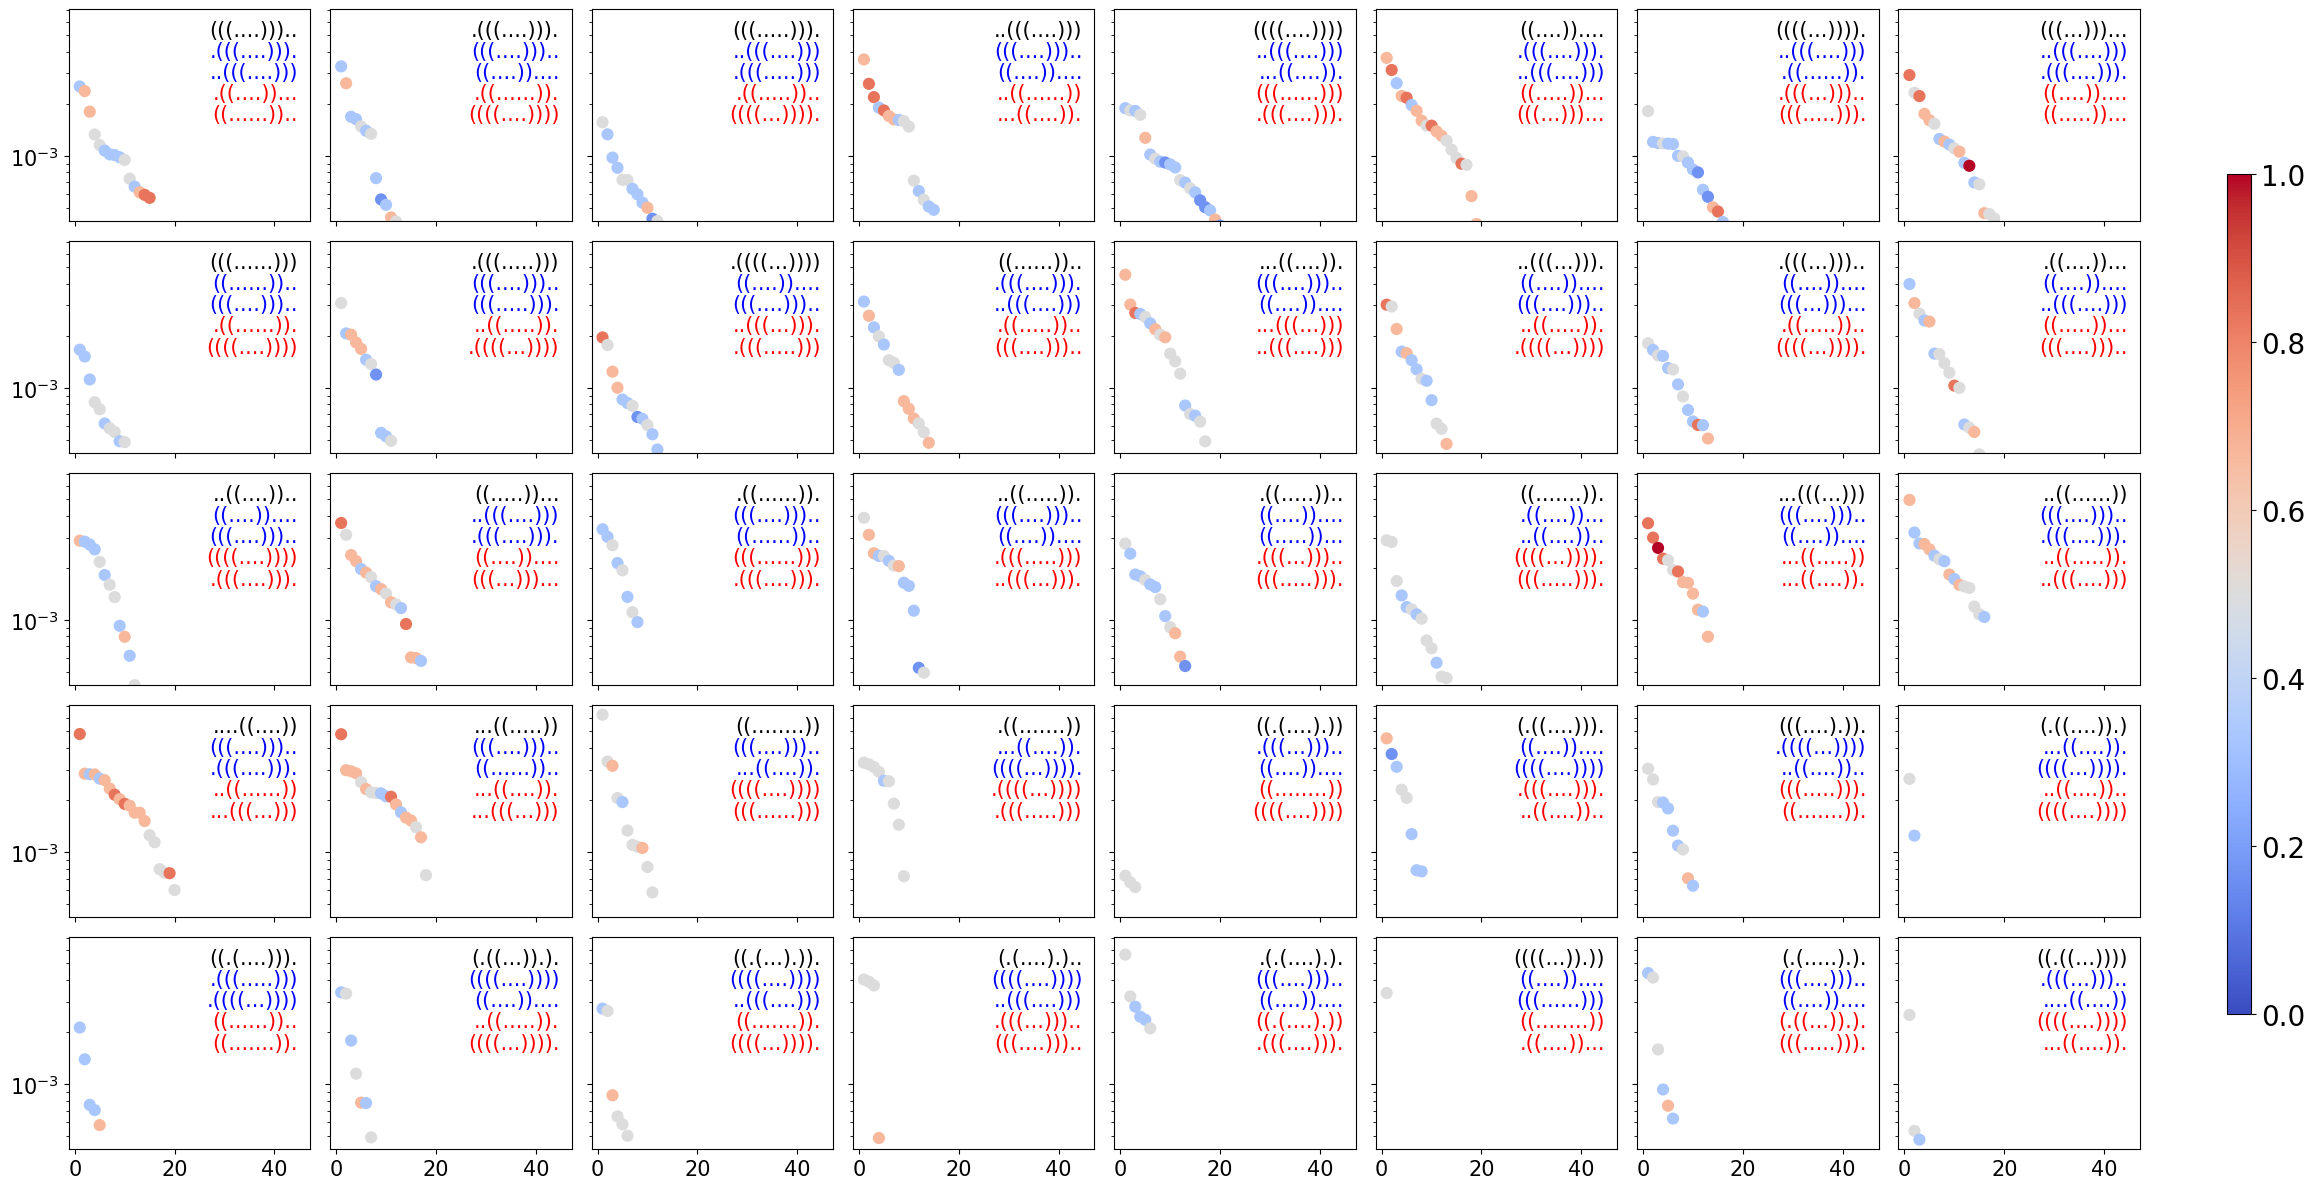

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig, axs = plt.subplots(5, 8, figsize=(24, 12), sharex=True, sharey=True)
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

for i, ax in enumerate(axs.flatten()):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listfreq = []
        distances = []
        listhamming = []
        phenos = []

        for q, phi in qitems.items():
            if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
                continue
            listphipq.append(phi)
            listfreq.append(neutralsets[q+'\n'] / K**L)
            listhamming.append(hamming(key, q))
            # Calculate the distance from the point to the diagonal y = x
            distance = -(phi - (neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
            distances.append(distance)
            phenos.append(q)
        
        # Get the sorted indices of distances in descending order
        sorted_indices = np.argsort(distances)[::-1]
        
        # Sort distances and listhamming based on the sorted indices
        ranked_distances = np.array(distances)[sorted_indices]
        sorted_listhamming = np.array(listhamming)[sorted_indices]
        sorted_phenos = np.array(phenos)[sorted_indices]
        
        # Plot the distance versus its ranking
        scatter = ax.scatter(np.arange(1, len(ranked_distances)+1), ranked_distances, s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
        ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.text(0.95, 0.95, key, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)
        for j in range(1,3):
            ax.text(0.95, 0.95-0.1*j, f"{sorted_phenos[j-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'blue')
        for k in range(1,3):
            ax.text(0.95, 0.95-0.1*j-0.1*k, f"{sorted_phenos[-2:][k-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'red')
# Set common labels
#fig.text(0.5, 0.04, 'Ranking', ha='center', fontsize=20)
#fig.text(0.04, 0.5, 'Distance', va='center', rotation='vertical', fontsize=20)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.7])  # Move to the right and make thinner
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar
plt.savefig("distance_ranking.png", bbox_inches='tight')
plt.show()

### combined

# Neutral correlations

In [4]:
with open("../data/rhopDPD.pkl","rb") as f:
    rhopDPD = pickle.load(f)
with open("../data/rhopMFE.pkl","rb") as f:
    rhopD= pickle.load(f)
with open("../data/neutralsetsDPD.pkl","rb") as f:
    neutralsetsDPD= pickle.load(f)

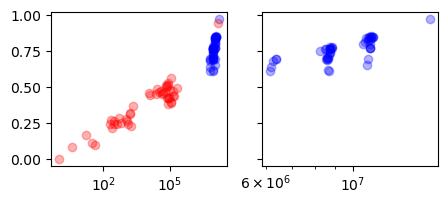

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(5,2), sharey=True)
ax[0].scatter(list(neutralsetsDPD.values()),list(rhopDPD.values()),color='blue',alpha=0.3)
ax[0].scatter(list(neutralsets.values()),list(rhopD.values()),color='red',alpha=0.3)
ax[0].set_xscale('log')

ax[1].scatter(list(neutralsetsDPD.values()),list(rhopDPD.values()),color='blue',alpha=0.3)
ax[1].set_xscale('log')

# Site quantities

Take the each site and calculate average Hamming distance (local and global) from each mutation on it in the neutral set.

In [3]:
import pickle
with open("../data/sitesevolvability.pkl","rb") as f:
    sitesevolvability = pickle.load(f)
with open("../data/sitesrobustness.pkl","rb") as f:
    sitesrobustness = pickle.load(f)
with open("../data/siteshammingmean.pkl","rb") as f:
    siteshammingmean = pickle.load(f)
with open("../data/siteshammingstd.pkl","rb") as f:
    siteshammingstd = pickle.load(f)
with open("../data/phi_pq_site.pkl","rb") as f:
    phipq_site = pickle.load(f)

In [4]:
with open("../data/DGPmap.pkl","rb") as f:
    gpmap = pickle.load(f)

In [5]:
foldtoseq = defaultdict(list)
for k,v in gpmap.items():
    foldtoseq[v].append(k)

## Site robustness, evolvability and hamming distance

In [7]:
def find_local_maxima(siteshamming):
    local_maxima = []
    
    # Check if the first element is a local maximum
    if len(siteshamming) > 1 and siteshamming[0] > siteshamming[1]:
        local_maxima.append(0)
    
    # Iterate through the list to find local maxima
    for i in range(1, len(siteshamming) - 1):
        if siteshamming[i] > siteshamming[i - 1] and siteshamming[i] > siteshamming[i + 1]:
            local_maxima.append(i)
    
    # Check if the last element is a local maximum
    if len(siteshamming) > 1 and siteshamming[-1] > siteshamming[-2]:
        local_maxima.append(len(siteshamming)-1)
    
    return local_maxima

In [8]:
def mutationalneighbours_site(seq,site):
    mutations = {'A': ['C','U','G'],'C': ['A','U','G'],'G': ['A','U','C'], 'U':['A','G','C']}
    return [seq[:site] + m + seq[site+1:] for m in mutations[str(seq[site])]]

In [6]:
def find_global_maximum(lst):
    """Returns the index and value of the global maximum"""
    max_value = max(lst)  # Find the max value
    max_index = lst.index(max_value)  # Find its index (first occurrence)
    return max_index, max_value

(((....)))..
.(((....))).
(((.....))).
..(((....)))
((((....))))
((....))....
((((...)))).
(((...)))...
(((......)))
.(((.....)))
.((((...))))
((......))..
...((....)).
..(((...))).
.(((...)))..
.((....))...
..((....))..
((.....))...
.((......)).
..((.....)).
.((.....))..
((.......)).
...(((...)))
..((......))
....((....))
...((.....))
((........))
.((.......))
((.(....).))
(.((....))).
(((....).)).
(.((....)).)
((.(....))).
(.((...)).).
((.(...).)).
(.(....).)..
.(.(....).).
((((...)).))
(.(.....).).
((.((...))))
.(.((...)).)
.((.(...).))
.(((....).))
.((.(....)))
(((....)).).
..(.(....).)
(..(....)..)


/tmp/ipykernel_1458385/2104338851.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


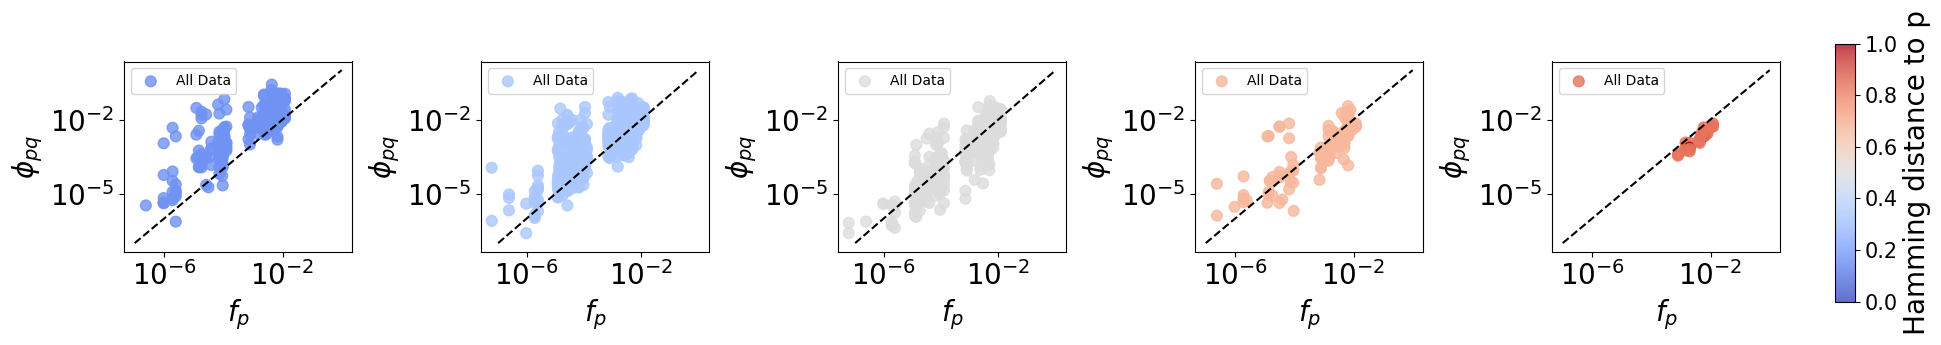

In [14]:


# Create subplots
#check that these are overrepresented 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
        if i == 0:
            continue
    #if i >=1 and i <=6: 
        print(key)
        qitems = phipq[key]
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key:
                continue
            hamming_dist = hamming(key, q)
            listphipq.append(phi)
            listhamming.append(hamming_dist)
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
            # Assign to appropriate range
            if hamming_dist < 4/12:
                idx = 0
            elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                idx = 1
            elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                idx = 2
            elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                idx = 3
            else:
                idx = 4

            listphipq_ranges[idx].append(phi)
            listhamming_ranges[idx].append(hamming_dist)
            listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)
       

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
    #scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

[1, 4, 8, 11]
[2, 6, 9]
[1, 5, 9, 11]
[0, 3, 6, 10]
[2, 6, 10]
[4, 7, 11]
[2, 5, 8, 11]
[1, 4, 7, 11]
[1, 6, 10]
[0, 2, 6, 10]
[0, 3, 6, 9]
[1, 4, 8, 11]
[0, 3, 7]
[0, 3, 6, 9]
[2, 5, 8, 11]
[1, 4, 7, 11]
[0, 2, 6, 9, 11]
[1, 4, 7, 11]
[2, 6, 9]
[0, 2, 6, 10]
[2, 5, 9, 11]
[1, 4, 9, 11]
[0, 4, 7, 10]
[0, 3, 7, 11]
[0, 7]
[0, 4, 7, 11]
[1, 3, 5, 8, 11]
[2, 6, 11]
[1, 5, 10]
[2, 6, 8, 11]
[0, 4, 9, 11]
[0, 2, 6, 9, 11]
[0, 5, 11]
[0, 2, 5, 8, 11]
[0, 4, 6, 9, 11]
[0, 2, 4, 7, 11]
[1, 5, 7, 10]
[0, 4, 7, 11]
[0, 2, 5, 8, 11]
[1, 4, 6, 11]
[0, 4, 7, 11]
[2, 5, 7, 10]
[0, 5, 7, 11]
[0, 2, 5, 8, 11]


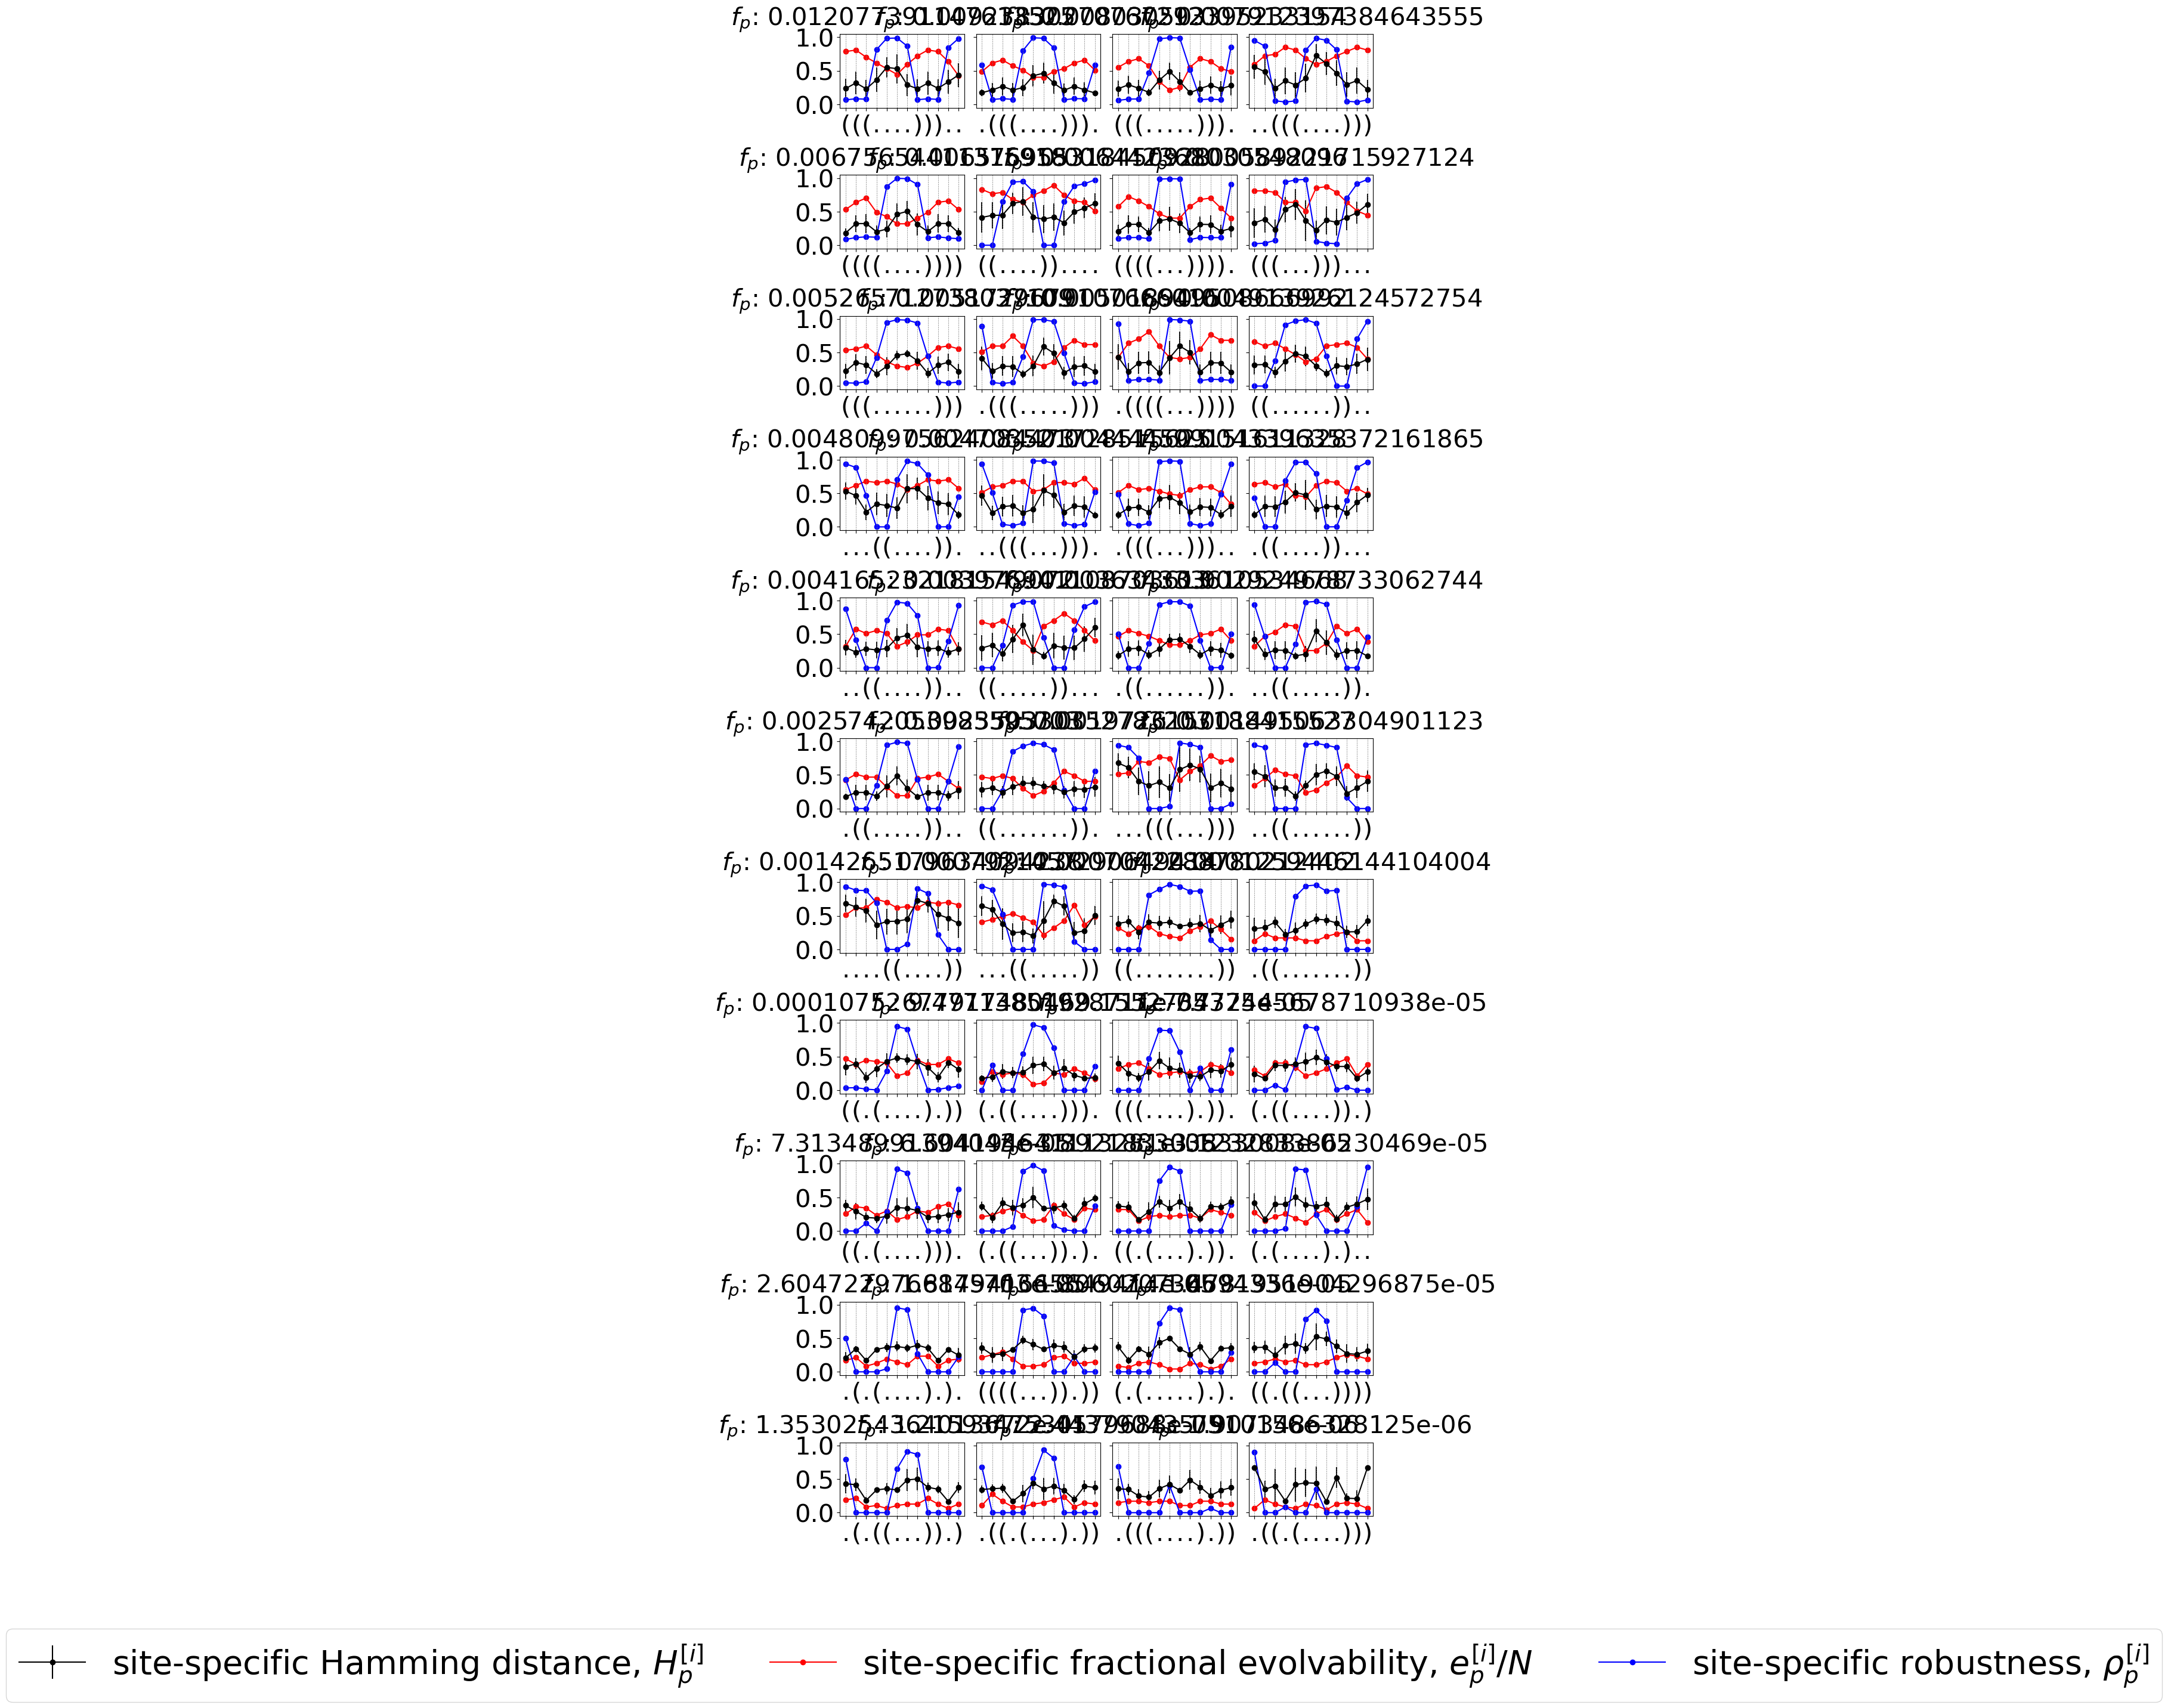

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import functools
import matplotlib.cm as cm
# Define the number of rows
num_rows = 11

# Calculate the number of columns needed
num_cols = 4
L = 12
# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2.5, num_rows * 2.5), sharey=True)

# Flatten the axs array for easy iteration
axs = axs.flatten()
sites_pos = np.arange(1, L + 1, 1)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Collect handles and labels for the legend
handles, labels = [], []
listneutralsets = list(sort_neutralsets.keys())
largerobustsite = defaultdict(list)
largerobustsite_filtered= defaultdict(dict)
for i, ax in enumerate(axs):
    if i < len(listneutralsets):
        
        key = listneutralsets[i + 1]
        
        # Fill the data dictionary with relative areas
       

        # Plot the line plot on top of the bar plot
        siteshamming = [0] * L
        siteshammingerr = [0] * L
        dataevolvability = [0] * L
        dataevolvweight = [0] * L
        datarobust = [0] * L

        for site, avgs in siteshammingmean[key].items():
            siteshamming[site] = avgs
            siteshammingerr[site] = siteshammingstd[key][site]
            dataevolvability[site] = sitesevolvability[key][site]  # Fractional evolvability
            datarobust[site] = sitesrobustness[key][site]
        sitesmaxlocal = []
        max_index, max_value= find_global_maximum(datarobust)
        local_maxima = find_local_maxima(siteshamming)
        print(local_maxima)
        for max_index in range(L):
            if max_index in local_maxima: 
                for seq in foldtoseq[key]:
                    for mut in mutationalneighbours_site(seq, max_index):
                            if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                                largerobustsite[(key,max_index)].append(gpmap[mut])
                dict_count = Counter(largerobustsite[(key,max_index)])
                sorted_dict_h = defaultdict(tuple)
                for structure, count in dict_count.items():
                    sorted_dict_h[structure] = (hamming(key, structure),count)
                structures = sorted_dict_h
                # Extract Hamming distances and frequencies
                distances = np.array([v[0] for v in structures.values()])  # List of Hamming distances
                frequencies = np.array([v[1] for v in structures.values()])  # List of frequencies

                # Compute mean Hamming distance (weighted mean)
                weighted_mean = np.sum(distances * frequencies) / np.sum(frequencies)

                # Compute each structure's contribution to the mean
                contributions = (distances * frequencies) / np.sum(distances * frequencies)

                # Store results in a dictionary
                contribution_dict = {structure: contrib for structure, contrib in zip(structures.keys(), contributions)}

                # Sort by contribution (descending)
                sorted_contributions = dict(sorted(contribution_dict.items(), key=lambda item: item[1], reverse=True))
                cumulative_contributions = np.cumsum(list(sorted_contributions.values()))
                cutoff_index = np.argmax(cumulative_contributions >= 0.9) + 1  # Find first index reaching 90%
                filtered_structures_cumulative = dict(list(sorted_contributions.items())[:cutoff_index])
                largerobustsite_filtered[key][max_index] = list(filtered_structures_cumulative.keys())
                    #if gpmap[seq] not in largerobustsite:
                    #    largerobustsite[gpmap[seq]] = set()
                    #for mut in mutationalneighbours_site(seq, site):
                    #    if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                    #        largerobustsite[gpmap[seq]].add(gpmap[mut])

        line1 = ax.errorbar(sites_pos, np.array(siteshamming), yerr=np.array(siteshammingerr), fmt = '-o', color='black', label=r'site-specific Hamming distance, $H_p^{[i]}$')
        line2, = ax.plot(sites_pos, np.array(dataevolvability), '-o', color='red', label=r'site-specific fractional evolvability, $e_p^{[i]}/N$')
        line3, = ax.plot(sites_pos, np.array(datarobust), '-o', color='blue', label=r'site-specific robustness, $\rho_p^{[i]}$')

        # Collect handles and labels from the plots
        if i == 0:
            handles.extend([line1, line2, line3])
            labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

        # Custom x-tick labels with larger or bold characters
        new_labels = []
        sumchar = 0
        labeldict = Counter(key)
        for char in key:
            if char == '.' and sumchar == labeldict['(']:
                new_labels.append('.')
            else:
                if char == '(':
                    sumchar += 1
                elif char == ')':
                    sumchar -= 1
                new_labels.append(char)
        ax.set_xticks(sites_pos)
        ax.set_xticklabels(new_labels, size=20)
        ax.set_title(f'$f_p$: {sort_neutralsets[key]/K**L}', fontsize=30)
        ax.set_yticks([1.0, 0.5, 0.0])
        ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick label size
        for pos in sites_pos:
            ax.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)

# Add a legend for the entire figure at the bottom with two rows
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=(len(listneutralsets) + 1) // 4, fontsize=40)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("sitequantities.png", bbox_inches='tight')
plt.show()

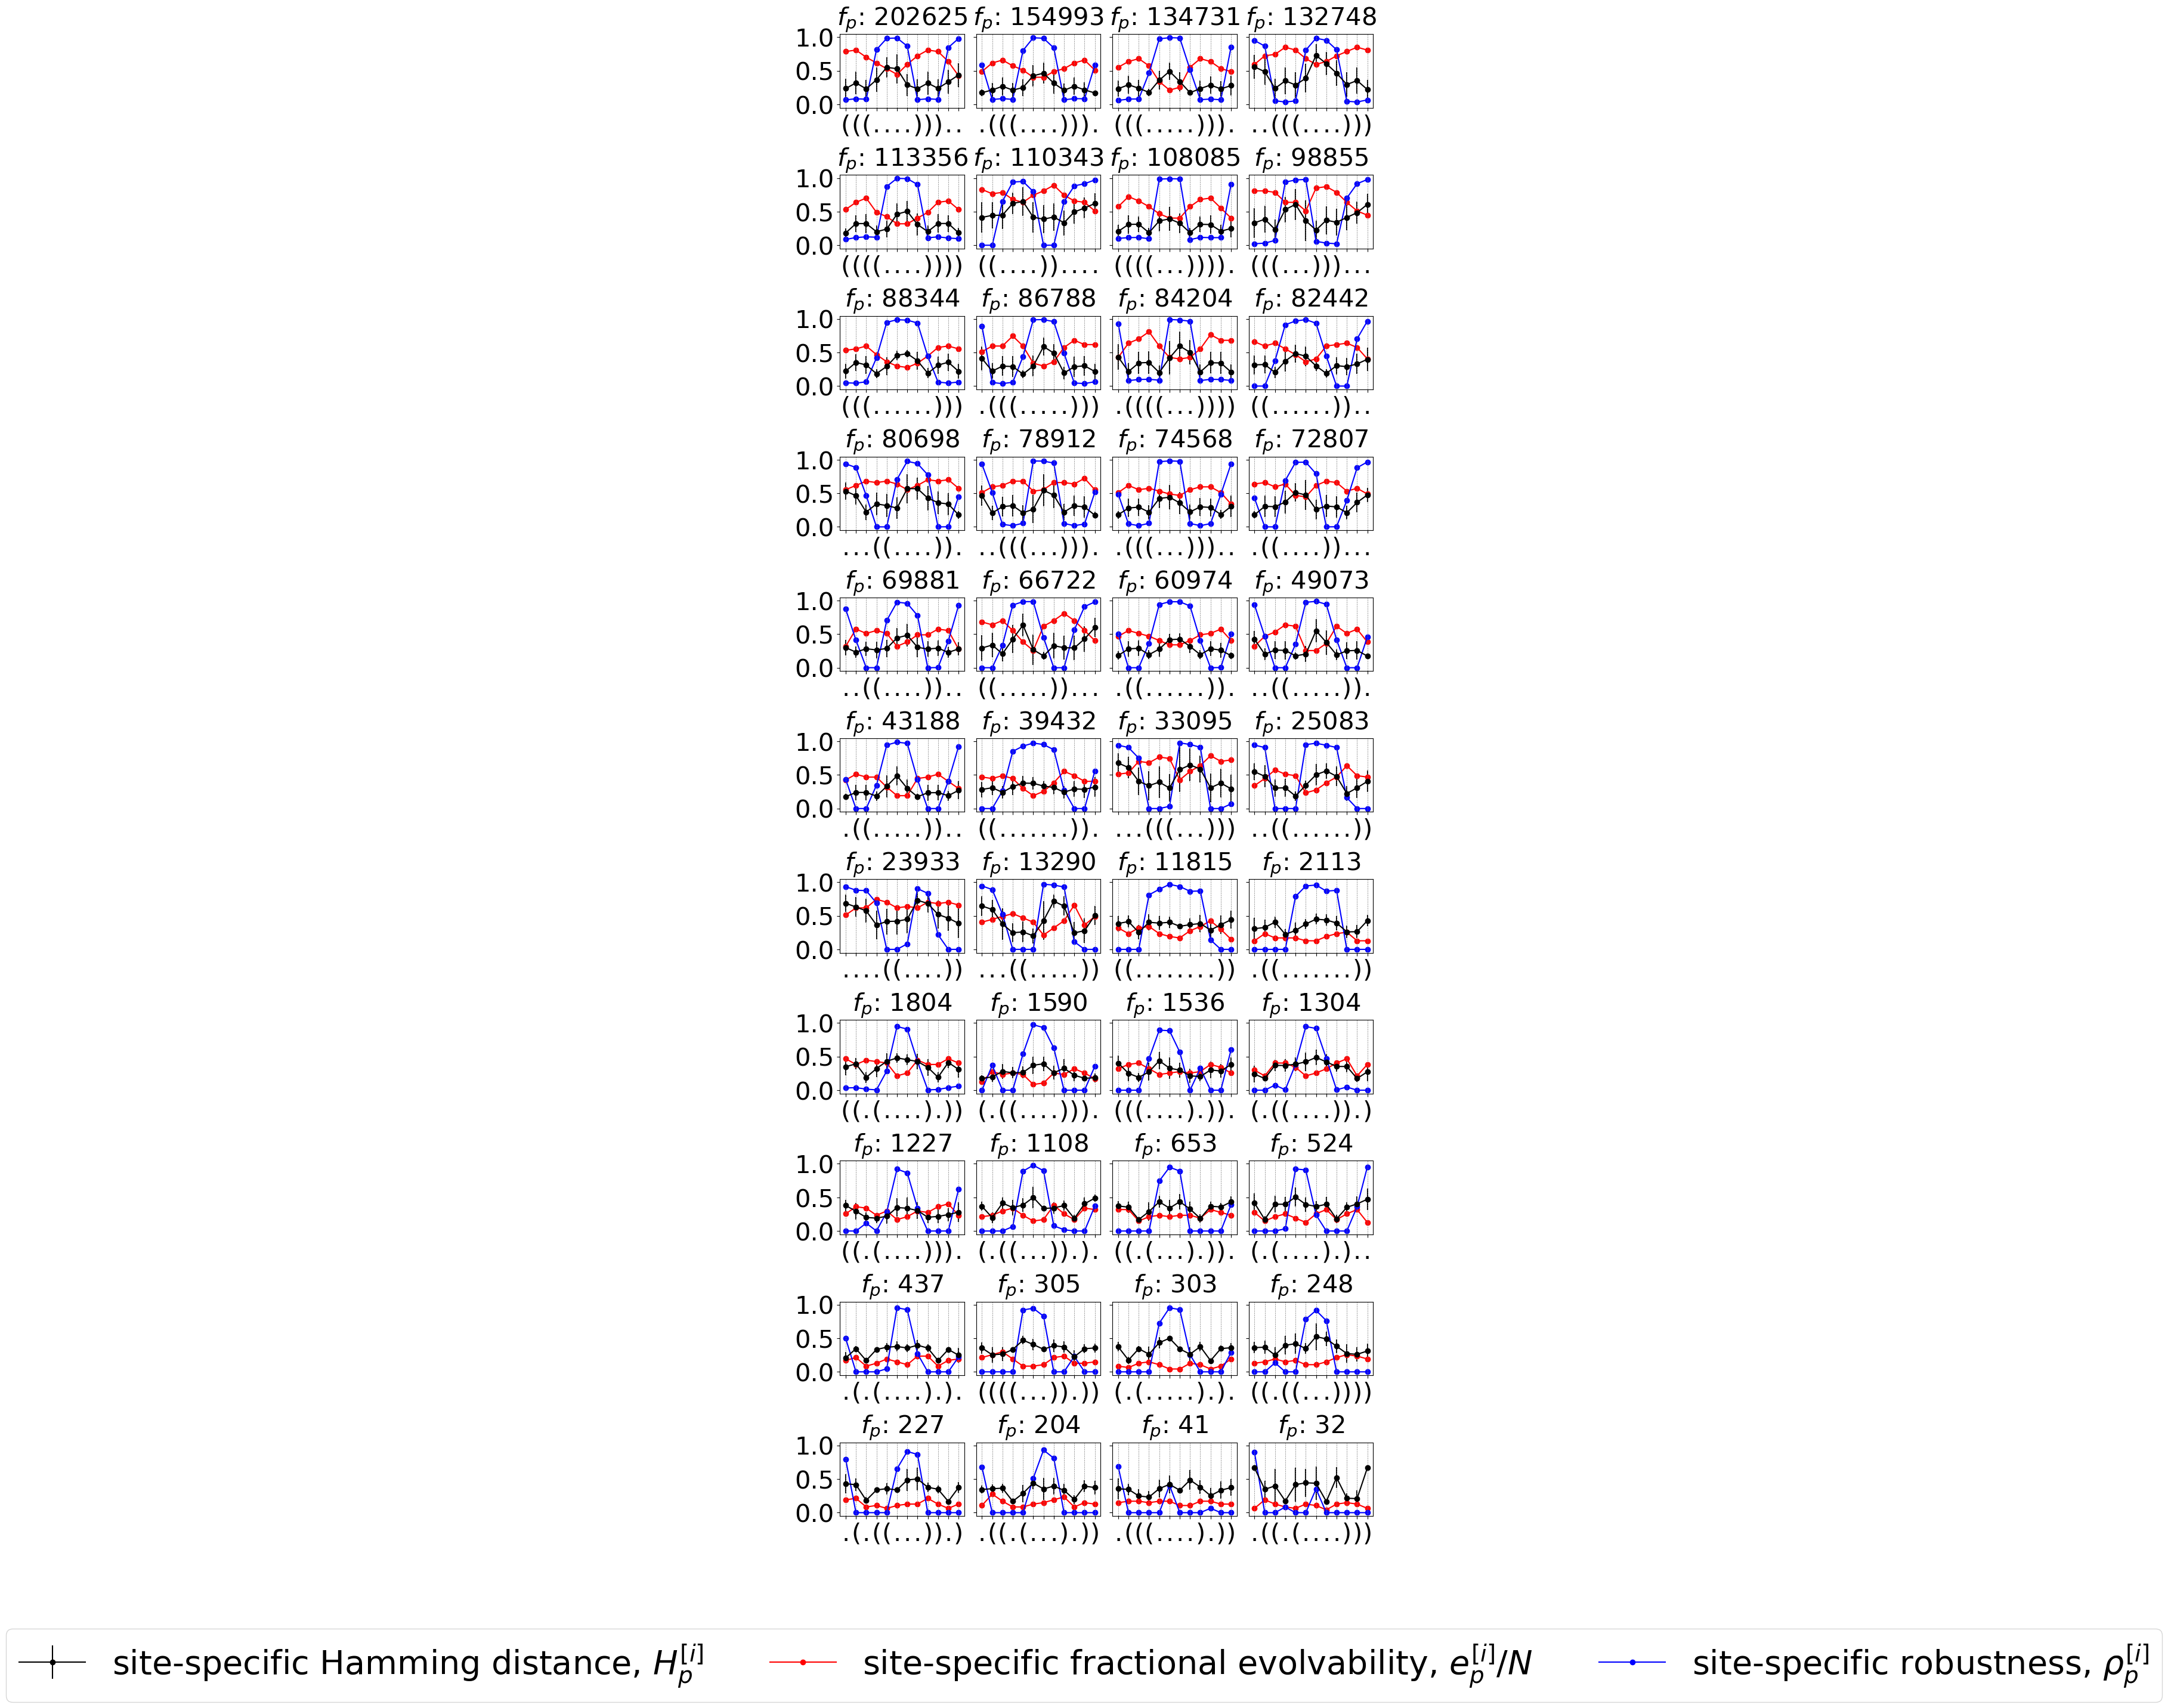

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import functools
import matplotlib.cm as cm
# Define the number of rows
num_rows = 11

# Calculate the number of columns needed
num_cols = 4
L = 12
# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2.5, num_rows * 2.5), sharey=True)

# Flatten the axs array for easy iteration
axs = axs.flatten()
sites_pos = np.arange(1, L + 1, 1)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Collect handles and labels for the legend
handles, labels = [], []
listneutralsets = list(sort_neutralsets.keys())
constsite = defaultdict(list)
constsite_filtered= defaultdict(dict)
for i, ax in enumerate(axs):
    if i < len(listneutralsets):
        
        key = listneutralsets[i + 1]
        
        # Fill the data dictionary with relative areas
       

        # Plot the line plot on top of the bar plot
        siteshamming = [0] * L
        siteshammingerr = [0] * L
        dataevolvability = [0] * L
        dataevolvweight = [0] * L
        datarobust = [0] * L

        for site, avgs in siteshammingmean[key].items():
            siteshamming[site] = avgs
            siteshammingerr[site] = siteshammingstd[key][site]
            dataevolvability[site] = sitesevolvability[key][site]  # Fractional evolvability
            datarobust[site] = sitesrobustness[key][site]
        
        for index in range(L):
            if key[index] == '(' or key[index] == ')': 
                for seq in foldtoseq[key]:
                    for mut in mutationalneighbours_site(seq, index):
                            if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                                constsite[(key,index)].append(gpmap[mut])
                dict_count = Counter(constsite[(key,index)])
                sorted_dict_h = defaultdict(tuple)
                for structure, count in dict_count.items():
                    sorted_dict_h[structure] = (hamming(key, structure),count)
                structures = sorted_dict_h
                # Extract Hamming distances and frequencies
                distances = np.array([v[0] for v in structures.values()])  # List of Hamming distances
                frequencies = np.array([v[1] for v in structures.values()])  # List of frequencies

                # Compute mean Hamming distance (weighted mean)
                weighted_mean = np.sum(distances * frequencies) / np.sum(frequencies)

                # Compute each structure's contribution to the mean
                contributions = (distances * frequencies) / np.sum(distances * frequencies)

                # Store results in a dictionary
                contribution_dict = {structure: contrib for structure, contrib in zip(structures.keys(), contributions)}

                # Sort by contribution (descending)
                sorted_contributions = dict(sorted(contribution_dict.items(), key=lambda item: item[1], reverse=True))
                cumulative_contributions = np.cumsum(list(sorted_contributions.values()))
                cutoff_index = np.argmax(cumulative_contributions >=0.9) + 1  # Find first index reaching 90%
                filtered_structures_cumulative = dict(list(sorted_contributions.items())[:cutoff_index])
                constsite_filtered[key][index] = list(filtered_structures_cumulative.keys())
                    #if gpmap[seq] not in largerobustsite:
                    #    largerobustsite[gpmap[seq]] = set()
                    #for mut in mutationalneighbours_site(seq, site):
                    #    if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                    #        largerobustsite[gpmap[seq]].add(gpmap[mut])

        line1 = ax.errorbar(sites_pos, np.array(siteshamming), yerr=np.array(siteshammingerr), fmt = '-o', color='black', label=r'site-specific Hamming distance, $H_p^{[i]}$')
        line2, = ax.plot(sites_pos, np.array(dataevolvability), '-o', color='red', label=r'site-specific fractional evolvability, $e_p^{[i]}/N$')
        line3, = ax.plot(sites_pos, np.array(datarobust), '-o', color='blue', label=r'site-specific robustness, $\rho_p^{[i]}$')

        # Collect handles and labels from the plots
        if i == 0:
            handles.extend([line1, line2, line3])
            labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

        # Custom x-tick labels with larger or bold characters
        new_labels = []
        sumchar = 0
        labeldict = Counter(key)
        for char in key:
            if char == '.' and sumchar == labeldict['(']:
                new_labels.append('.')
            else:
                if char == '(':
                    sumchar += 1
                elif char == ')':
                    sumchar -= 1
                new_labels.append(char)
        ax.set_xticks(sites_pos)
        ax.set_xticklabels(new_labels, size=20)
        ax.set_title(f'$f_p$: {sort_neutralsets[key]}', fontsize=30)
        ax.set_yticks([1.0, 0.5, 0.0])
        ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick label size
        for pos in sites_pos:
            ax.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)

# Add a legend for the entire figure at the bottom with two rows
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=(len(listneutralsets) + 1) // 4, fontsize=40)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("sitequantities.png", bbox_inches='tight')
plt.show()

NameError: name 'foldtoseq' is not defined

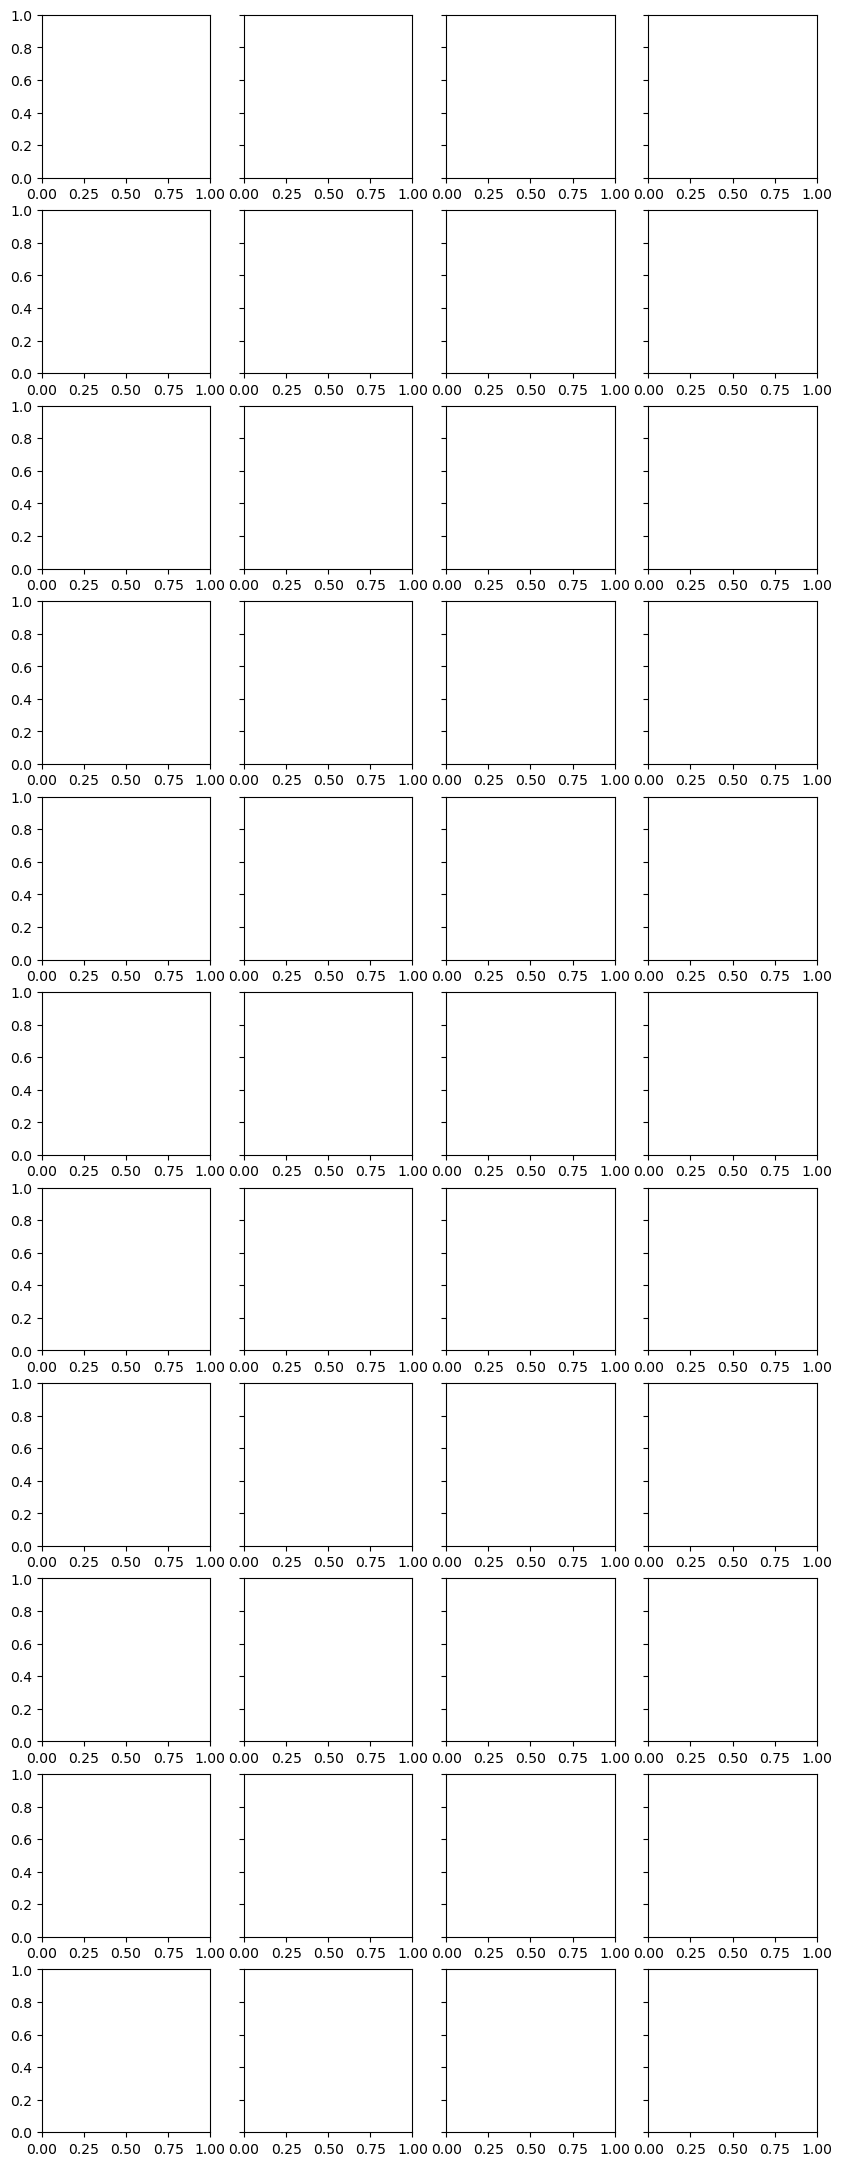

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import functools
import matplotlib.cm as cm
# Define the number of rows
num_rows = 11

# Calculate the number of columns needed
num_cols = 4
L = 12
# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2.5, num_rows * 2.5), sharey=True)

# Flatten the axs array for easy iteration
axs = axs.flatten()
sites_pos = np.arange(1, L + 1, 1)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Collect handles and labels for the legend
handles, labels = [], []
listneutralsets = list(sort_neutralsets.keys())
uconstsite = defaultdict(list)
uconstsite_filtered= defaultdict(dict)
for i, ax in enumerate(axs):
    if i < len(listneutralsets):
        
        key = listneutralsets[i + 1]
        
        # Fill the data dictionary with relative areas
       

        # Plot the line plot on top of the bar plot
        siteshamming = [0] * L
        siteshammingerr = [0] * L
        dataevolvability = [0] * L
        dataevolvweight = [0] * L
        datarobust = [0] * L

        for site, avgs in siteshammingmean[key].items():
            siteshamming[site] = avgs
            siteshammingerr[site] = siteshammingstd[key][site]
            dataevolvability[site] = sitesevolvability[key][site]  # Fractional evolvability
            datarobust[site] = sitesrobustness[key][site]
        
        for index in range(L):
            if key[index] == '.': 
                for seq in foldtoseq[key]:
                    for mut in mutationalneighbours_site(seq, index):
                            if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                                uconstsite[(key,index)].append(gpmap[mut])
                dict_count = Counter(uconstsite[(key,index)])
                sorted_dict_h = defaultdict(tuple)
                for structure, count in dict_count.items():
                    sorted_dict_h[structure] = (hamming(key, structure),count)
                structures = sorted_dict_h
                # Extract Hamming distances and frequencies
                distances = np.array([v[0] for v in structures.values()])  # List of Hamming distances
                frequencies = np.array([v[1] for v in structures.values()])  # List of frequencies

                # Compute mean Hamming distance (weighted mean)
                weighted_mean = np.sum(distances * frequencies) / np.sum(frequencies)

                # Compute each structure's contribution to the mean
                contributions = (distances * frequencies) / np.sum(distances * frequencies)

                # Store results in a dictionary
                contribution_dict = {structure: contrib for structure, contrib in zip(structures.keys(), contributions)}

                # Sort by contribution (descending)
                sorted_contributions = dict(sorted(contribution_dict.items(), key=lambda item: item[1], reverse=True))
                cumulative_contributions = np.cumsum(list(sorted_contributions.values()))
                cutoff_index = np.argmax(cumulative_contributions >= 0.9) + 1  # Find first index reaching 90%
                filtered_structures_cumulative = dict(list(sorted_contributions.items())[:cutoff_index])
                uconstsite_filtered[key][index] = list(filtered_structures_cumulative.keys())
                    #if gpmap[seq] not in largerobustsite:
                    #    largerobustsite[gpmap[seq]] = set()
                    #for mut in mutationalneighbours_site(seq, site):
                    #    if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                    #        largerobustsite[gpmap[seq]].add(gpmap[mut])

        line1 = ax.errorbar(sites_pos, np.array(siteshamming), yerr=np.array(siteshammingerr), fmt = '-o', color='black', label=r'site-specific Hamming distance, $H_p^{[i]}$')
        line2, = ax.plot(sites_pos, np.array(dataevolvability), '-o', color='red', label=r'site-specific fractional evolvability, $e_p^{[i]}/N$')
        line3, = ax.plot(sites_pos, np.array(datarobust), '-o', color='blue', label=r'site-specific robustness, $\rho_p^{[i]}$')

        # Collect handles and labels from the plots
        if i == 0:
            handles.extend([line1, line2, line3])
            labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

        # Custom x-tick labels with larger or bold characters
        new_labels = []
        sumchar = 0
        labeldict = Counter(key)
        for char in key:
            if char == '.' and sumchar == labeldict['(']:
                new_labels.append('.')
            else:
                if char == '(':
                    sumchar += 1
                elif char == ')':
                    sumchar -= 1
                new_labels.append(char)
        ax.set_xticks(sites_pos)
        ax.set_xticklabels(new_labels, size=20)
        ax.set_title(f'$f_p$: {sort_neutralsets[key]}', fontsize=30)
        ax.set_yticks([1.0, 0.5, 0.0])
        ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick label size
        for pos in sites_pos:
            ax.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)

# Add a legend for the entire figure at the bottom with two rows
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=(len(listneutralsets) + 1) // 4, fontsize=40)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("sitequantities.png", bbox_inches='tight')
plt.show()

In [31]:
largerobustsite_filtered

defaultdict(dict,
            {'(((....)))..': {1: ['((....))....',
               '..(((....)))',
               '.(((....))).',
               '((((....))))',
               '(((......)))',
               '.((((...))))',
               '...((....)).',
               '.(((.....)))',
               '((((...)))).',
               '(((.....))).',
               '.(((...)))..',
               '..(((...))).',
               '..((....))..',
               '.((......)).',
               '(((...)))...',
               '...(((...)))',
               '((.......)).',
               '..((.....)).'],
              4: ['..(((....)))',
               '.((((...))))',
               '...((....)).',
               '..(((...))).',
               '...(((...)))',
               '.(((....))).',
               '.(((.....)))',
               '((((....))))'],
              8: ['..(((....)))',
               '.(((....))).',
               '((....))....',
               '.((((...))))',
               '(((.....)

In [37]:
dict_count = Counter(largerobustsite['(((....)))..'])

In [31]:
from main.functions.structurefunctions import hamming


In [38]:
sorted_dict = dict(sorted(dict_count.items(), key=lambda item: item[1], reverse=True))

In [39]:
sorted_dict

{'((....))....': 890,
 '..(((....)))': 788,
 '...((....)).': 452,
 '...(((...)))': 434,
 '((((...)))).': 157,
 '(((...)))...': 116,
 '....((....))': 80,
 '.((......)).': 60,
 '.((((...))))': 58,
 '.(((.....)))': 55,
 '(((......)))': 54,
 '..(((...))).': 42,
 '((((....))))': 38,
 '.(((....))).': 37,
 '...((.....))': 32,
 '.(((...)))..': 23,
 '..((......))': 22,
 '..((.....)).': 22,
 '(((.....))).': 21,
 '.((.....))..': 3}

In [41]:
sorted_dict_h = defaultdict(tuple)
for structure, count in sorted_dict.items():
    sorted_dict_h[structure] = (hamming('(((....)))..', structure),count)

In [42]:
sorted_dict_h

defaultdict(tuple,
            {'((....))....': (0.3333333333333333, 890),
             '..(((....)))': (0.6666666666666666, 788),
             '...((....)).': (0.6666666666666666, 452),
             '...(((...)))': (0.8333333333333334, 434),
             '((((...)))).': (0.16666666666666666, 157),
             '(((...)))...': (0.16666666666666666, 116),
             '....((....))': (0.8333333333333334, 80),
             '.((......)).': (0.3333333333333333, 60),
             '.((((...))))': (0.5, 58),
             '.(((.....)))': (0.5, 55),
             '(((......)))': (0.3333333333333333, 54),
             '..(((...))).': (0.5, 42),
             '((((....))))': (0.3333333333333333, 38),
             '.(((....))).': (0.3333333333333333, 37),
             '...((.....))': (0.8333333333333334, 32),
             '.(((...)))..': (0.16666666666666666, 23),
             '..((......))': (0.6666666666666666, 22),
             '..((.....)).': (0.5, 22),
             '(((.....))).': (0.1666666666

In [43]:
from collections import Counter
import numpy as np

# Example: Dictionary where keys are structures and values are (Hamming distance, frequency)
structures = sorted_dict_h
# Extract Hamming distances and frequencies
distances = np.array([v[0] for v in structures.values()])  # List of Hamming distances
frequencies = np.array([v[1] for v in structures.values()])  # List of frequencies

# Compute mean Hamming distance (weighted mean)
weighted_mean = np.sum(distances * frequencies) / np.sum(frequencies)

# Compute each structure's contribution to the mean
contributions = (distances * frequencies) / np.sum(distances * frequencies)

# Store results in a dictionary
contribution_dict = {structure: contrib for structure, contrib in zip(structures.keys(), contributions)}

# Sort by contribution (descending)
sorted_contributions = dict(sorted(contribution_dict.items(), key=lambda item: item[1], reverse=True))

# Display results
print("Weighted Mean Hamming Distance:", weighted_mean)
print("Structures Contribution to Mean Hamming Distance:")
for structure, contribution in sorted_contributions.items():
    print(f"{structure}: {contribution:.2%}")


Weighted Mean Hamming Distance: 0.5312746256895193
Structures Contribution to Mean Hamming Distance:
..(((....))): 29.22%
...(((...))): 20.12%
...((....)).: 16.76%
((....))....: 16.50%
....((....)): 3.71%
.((((...)))): 1.61%
.(((.....))): 1.53%
...((.....)): 1.48%
((((...)))).: 1.46%
..(((...))).: 1.17%
.((......)).: 1.11%
(((...)))...: 1.08%
(((......))): 1.00%
..((......)): 0.82%
((((....)))): 0.70%
.(((....))).: 0.69%
..((.....)).: 0.61%
.(((...)))..: 0.21%
(((.....))).: 0.19%
.((.....))..: 0.03%


In [27]:
largerobustsite_filtered.keys()

dict_keys([('(((....)))..', 1), ('(((....)))..', 5), ('(((....)))..', 8)])

In [12]:


# Create subplots
#check that these are overrepresented 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
        if i == 0:
            continue
    #if i >=1 and i <=6: 
        print(key)
        qitems = phipq[key]
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key:
                continue
            hamming_dist = hamming(key, q)
            listphipq.append(phi)
            listhamming.append(hamming_dist)
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
            # Assign to appropriate range
            if hamming_dist < 4/12:
                idx = 0
            elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                idx = 1
            elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                idx = 2
            elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                idx = 3
            else:
                idx = 4

            listphipq_ranges[idx].append(phi)
            listhamming_ranges[idx].append(hamming_dist)
            listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)
            for site, structs in largerobustsite_filtered[key].items():
                    print(site,structs)
                    if q in structs:
                        listphipq_ranges_highrobust[idx].append(phi)
                        listhamming_ranges_highrobust[idx].append(hamming_dist)
                        listfreq_ranges_highrobust[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
    #scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

(((....)))..


NameError: name 'largerobustsite_filtered' is not defined

<Figure size 2000x300 with 0 Axes>

/tmp/ipykernel_2508361/2583886897.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


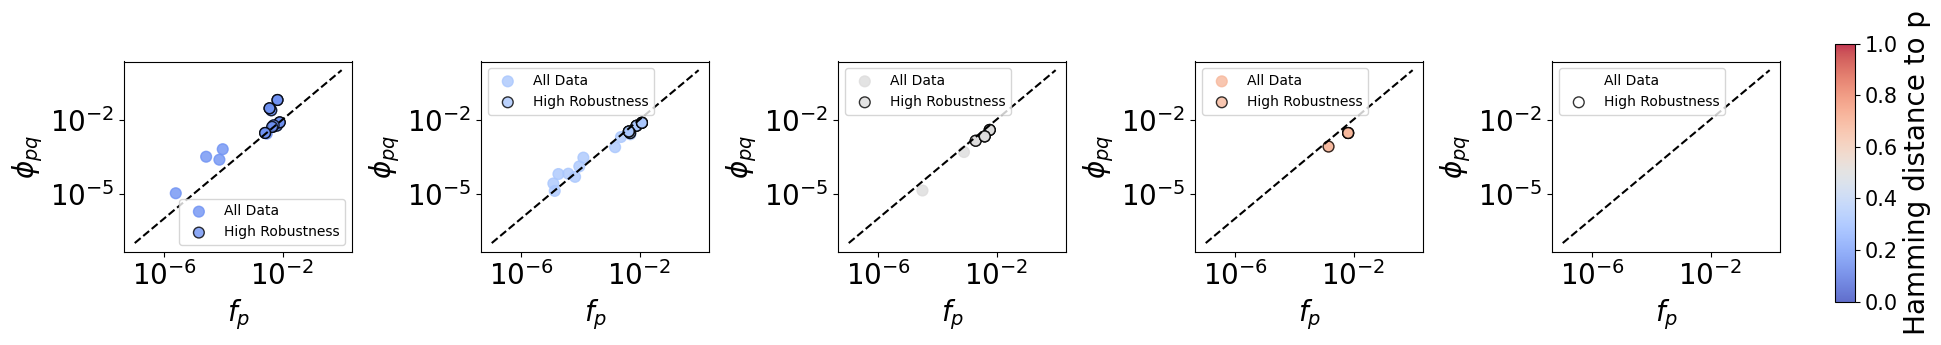

In [53]:


# Create subplots
#check that these are overrepresented 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue
    if i ==2: 
        qitems = phipq[key]
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key:
                continue
            hamming_dist = hamming(key, q)
            listphipq.append(phi)
            listhamming.append(hamming_dist)
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
            # Assign to appropriate range
            if hamming_dist < 4/12:
                idx = 0
            elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                idx = 1
            elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                idx = 2
            elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                idx = 3
            else:
                idx = 4

            listphipq_ranges[idx].append(phi)
            listhamming_ranges[idx].append(hamming_dist)
            listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)
            for site, structs in uconstsite_filtered[key].items():
                    if q in structs:
                        listphipq_ranges_highrobust[idx].append(phi)
                        listhamming_ranges_highrobust[idx].append(hamming_dist)
                        listfreq_ranges_highrobust[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
    scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_2508361/3444657662.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


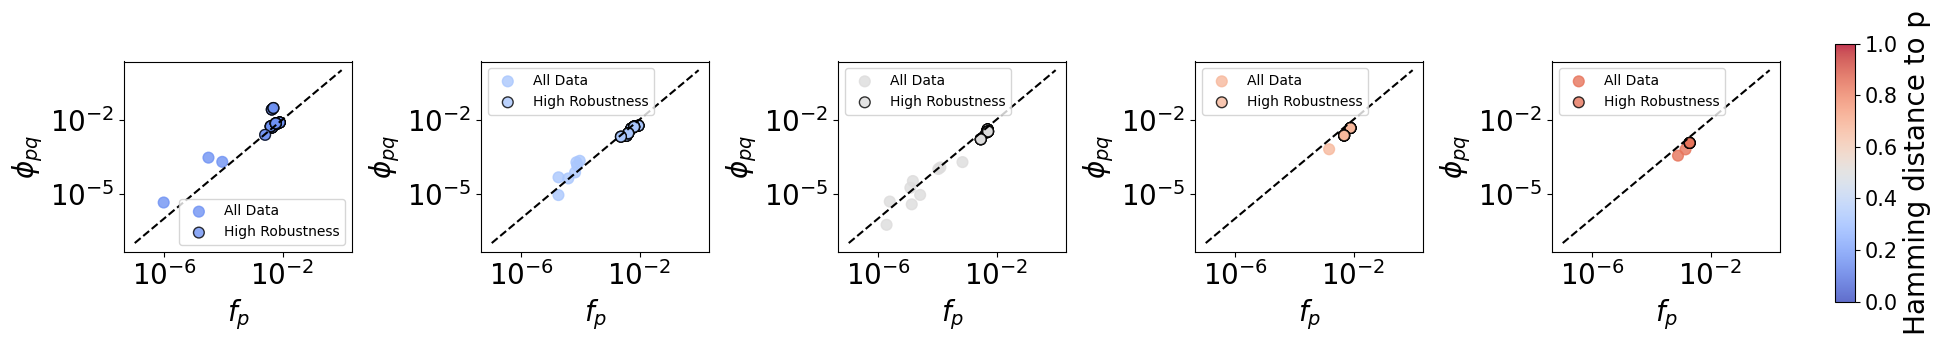

In [52]:


# Create subplots
#check that these are overrepresented 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue
    if i == 1: 
        qitems = phipq[key]
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key:
                continue
            hamming_dist = hamming(key, q)
            listphipq.append(phi)
            listhamming.append(hamming_dist)
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
            # Assign to appropriate range
            if hamming_dist < 4/12:
                idx = 0
            elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                idx = 1
            elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                idx = 2
            elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                idx = 3
            else:
                idx = 4

            listphipq_ranges[idx].append(phi)
            listhamming_ranges[idx].append(hamming_dist)
            listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)
            for site, structs in constsite_filtered[key].items():
                    if q in structs:
                        listphipq_ranges_highrobust[idx].append(phi)
                        listhamming_ranges_highrobust[idx].append(hamming_dist)
                        listfreq_ranges_highrobust[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
    scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

# Phi_pq site

/tmp/ipykernel_3413015/573337151.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


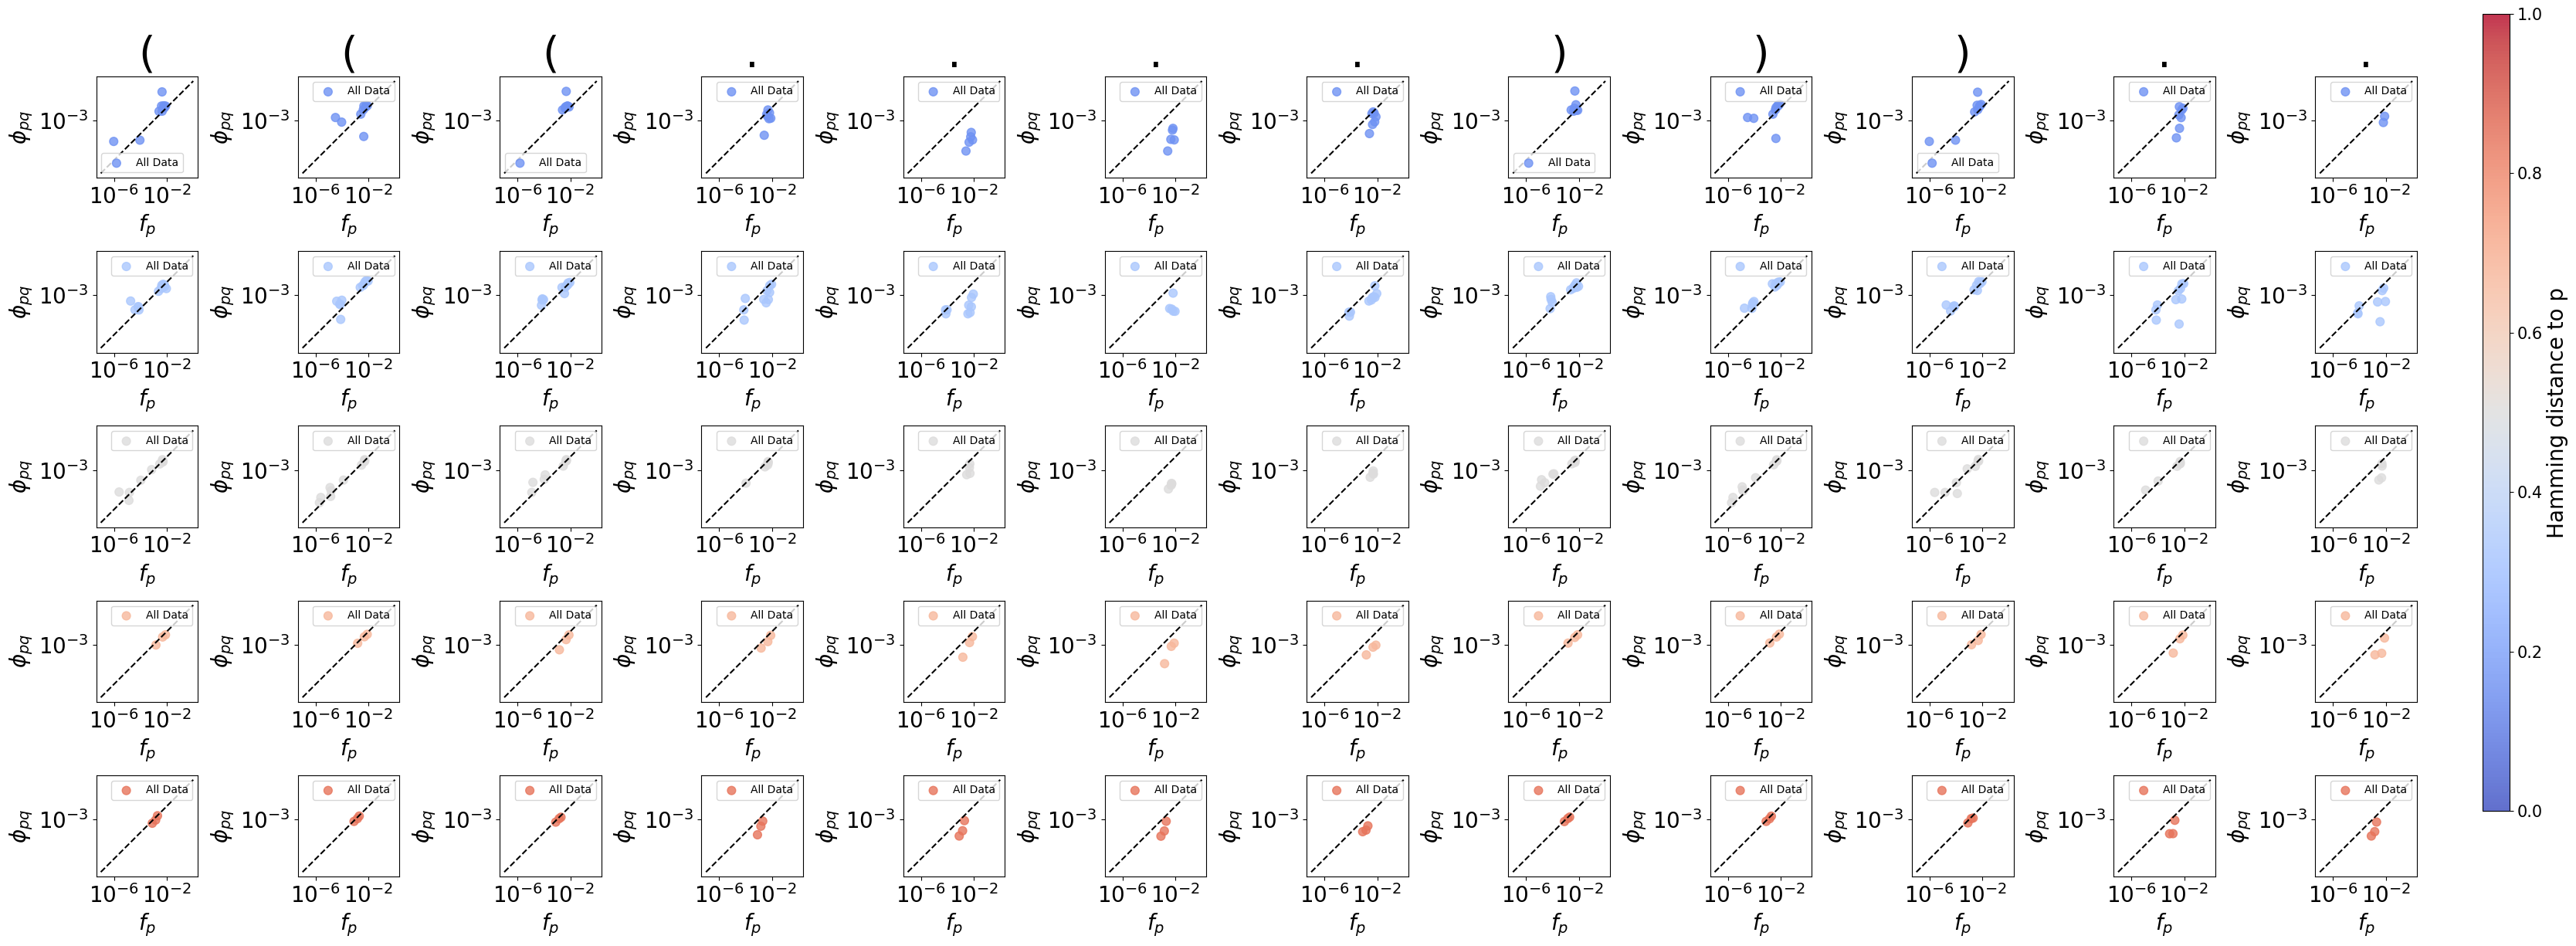

In [5]:


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(35,12))
gs = GridSpec(5, 12, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]

# Nested lists for each site and index combination
site_idx_phipq = [[[] for _ in range(L)] for _ in range(5)]
site_idx_hamming = [[[] for _ in range(L)] for _ in range(5)]
site_idx_freq = [[[] for _ in range(L)] for _ in range(5)]
m = 1
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0: continue
    if i == m:
        for site in range(L):
            qitems = phipq_site[key][site]
            
            for q, phi in qitems.items():
                if q == '.'*L or q == key:
                    continue
                hamming_dist = hamming(key, q)
                listphipq.append(phi)
                listhamming.append(hamming_dist)
                listfreq.append(neutralsets[q+'\n'] / K**L)
            
                # Assign to appropriate range
                if hamming_dist < 4/12:
                    idx = 0
                elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                    idx = 1
                elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                    idx = 2
                elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                    idx = 3
                else:
                    idx = 4

                #listphipq_ranges[idx].append(phi)
                #listhamming_ranges[idx].append(hamming_dist)
                #listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)

                # Append for a [site, idx] structure
                site_idx_phipq[idx][site].append(phi)
                site_idx_hamming[idx][site].append(hamming_dist)
                site_idx_freq[idx][site].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(12):
    for k in range(5):
        ax = fig.add_subplot(gs[k, j])
        if k == 0: ax.set_title(str(list(sort_neutralsets.keys())[m][j]), fontsize=40)
        scatter = ax.scatter(site_idx_freq[k][j], site_idx_phipq[k][j], s=60, c=site_idx_hamming[k][j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
        #scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.set_xlabel(r'$f_p$', fontsize=20)
        ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_3167298/1953752837.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


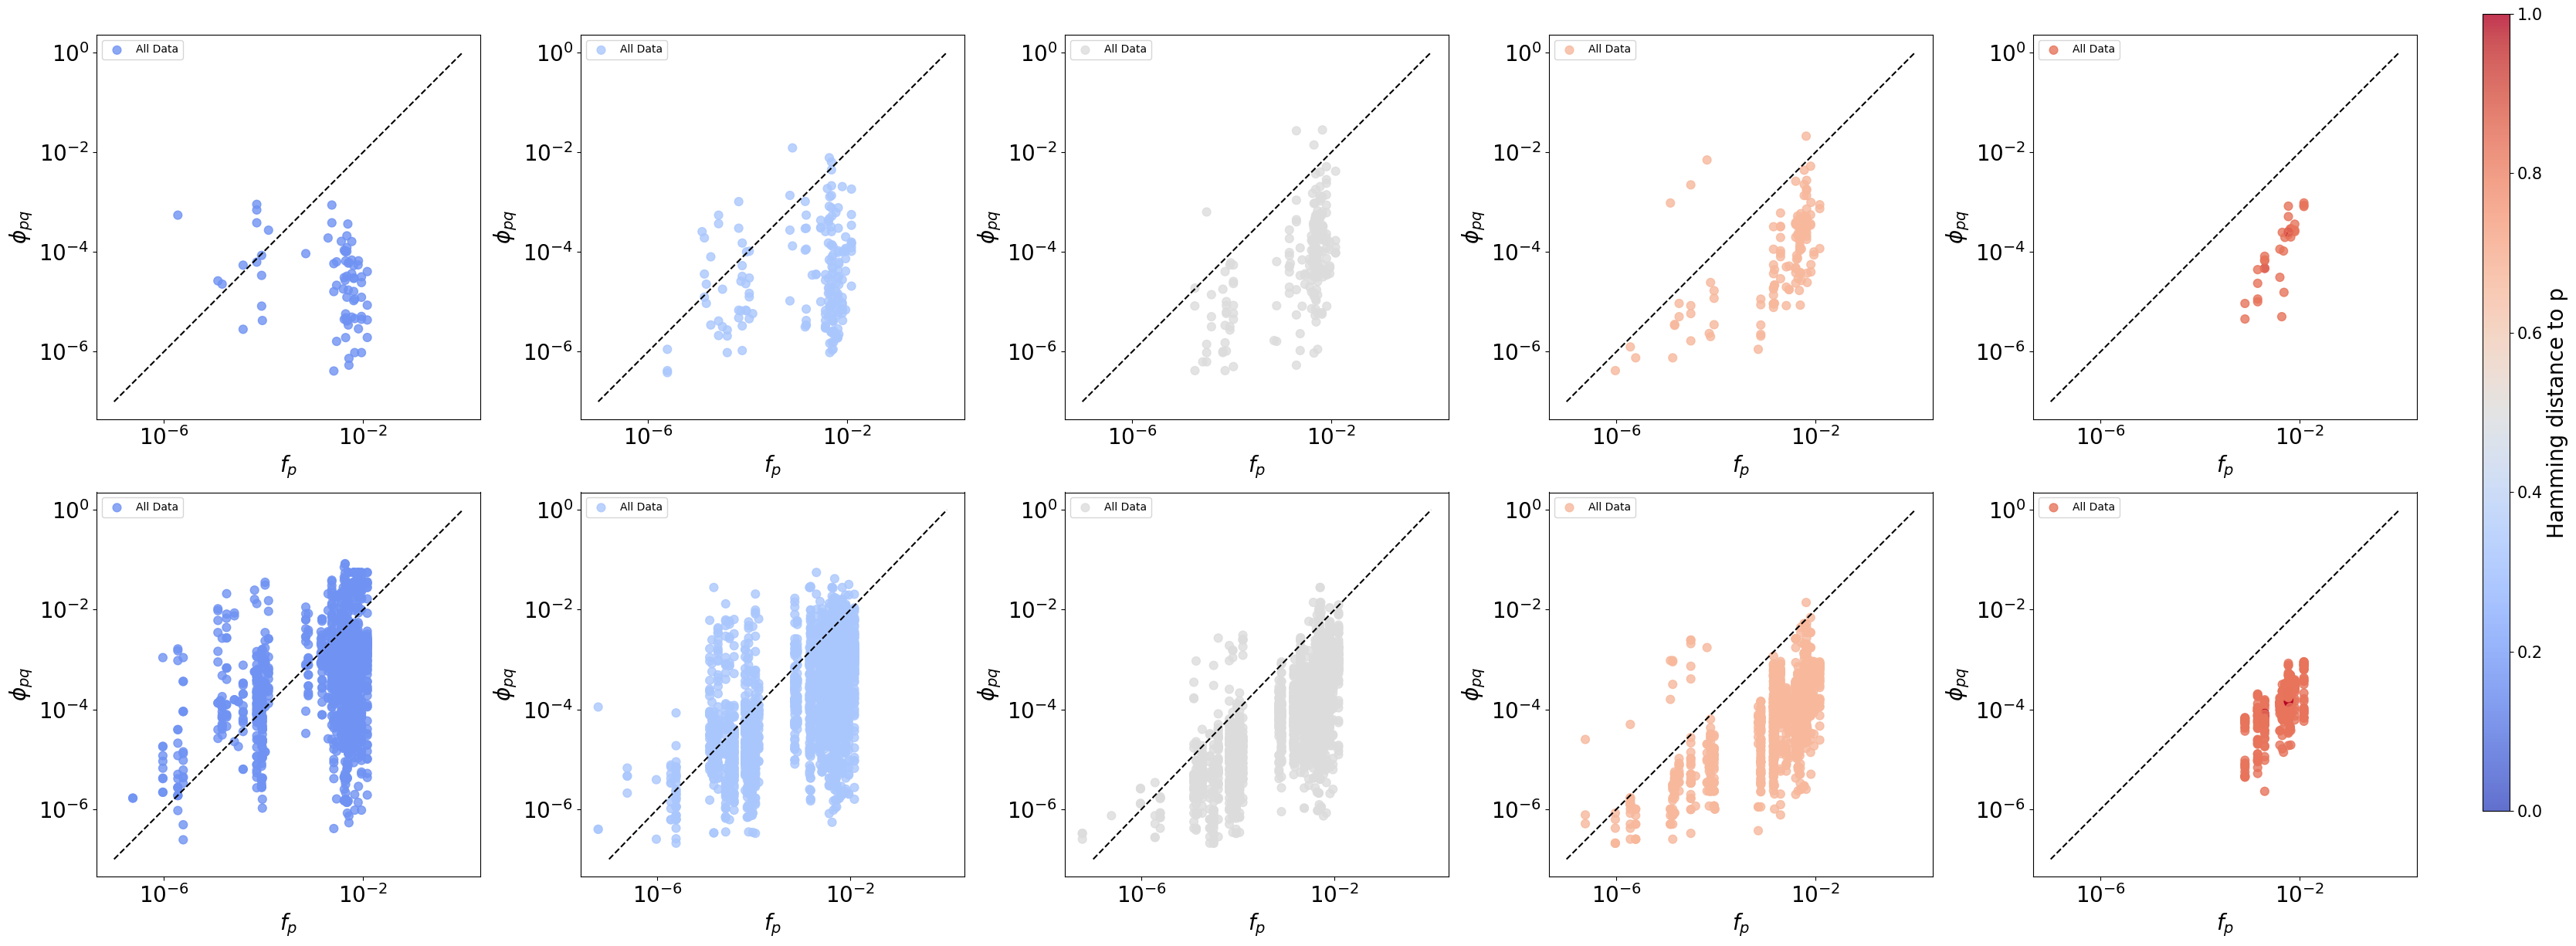

In [11]:


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(35,12))
gs = GridSpec(2, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]

# Nested lists for each site and index combination
site_idx_phipq = [[[] for _ in range(L)] for _ in range(5)]
site_idx_hamming = [[[] for _ in range(L)] for _ in range(5)]
site_idx_freq = [[[] for _ in range(L)] for _ in range(5)]
m = 4
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
        if i == 0: continue
    #if i > 0 and i < 28:
        sitehamming = [0]*12
        for s,vals in siteshammingmean[key].items():
            sitehamming[s] = vals
        
        sites_of_interest,max_value = find_global_maximum(sitehamming)
        for site in range(L):
            qitems = phipq_site[key][site]
            
            for q, phi in qitems.items():
                if q == '.'*L or q == key:
                    continue
                hamming_dist = hamming(key, q)
                listphipq.append(phi)
                listhamming.append(hamming_dist)
                listfreq.append(neutralsets[q+'\n'] / K**L)
            
                # Assign to appropriate range
                if hamming_dist < 4/12:
                    idx = 0
                elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                    idx = 1
                elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                    idx = 2
                elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                    idx = 3
                else:
                    idx = 4
           

                #if  key[site] == '.' and key[site-1]=='.' and key[site+1]=='.':
                #        site_idx_phipq[0][idx].append(phi)
                #        site_idx_hamming[0][idx].append(hamming_dist)
                #        site_idx_freq[0][idx].append(neutralsets[q+'\n'] / K**L)
                #elif key[site] == '(' or key[site] == ')':
                #    site_idx_phipq[1][idx].append(phi)
                #    site_idx_hamming[1][idx].append(hamming_dist)
                #    site_idx_freq[1][idx].append(neutralsets[q+'\n'] / K**L)
                if site == sites_of_interest:
                        site_idx_phipq[0][idx].append(phi/12.)
                        site_idx_hamming[0][idx].append(hamming_dist)
                        site_idx_freq[0][idx].append(neutralsets[q+'\n'] / K**L)
                else:
                        site_idx_phipq[1][idx].append(phi/12.)
                        site_idx_hamming[1][idx].append(hamming_dist)
                        site_idx_freq[1][idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    for k in range(2):
        ax = fig.add_subplot(gs[k, j])
        #if k == 0: ax.set_title(str(list(sort_neutralsets.keys())[m][j]), fontsize=40)
        scatter = ax.scatter(site_idx_freq[k][j], site_idx_phipq[k][j], s=60, c=site_idx_hamming[k][j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
        #scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.set_xlabel(r'$f_p$', fontsize=20)
        ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        axes.append(ax)


# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_3167298/4080431003.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


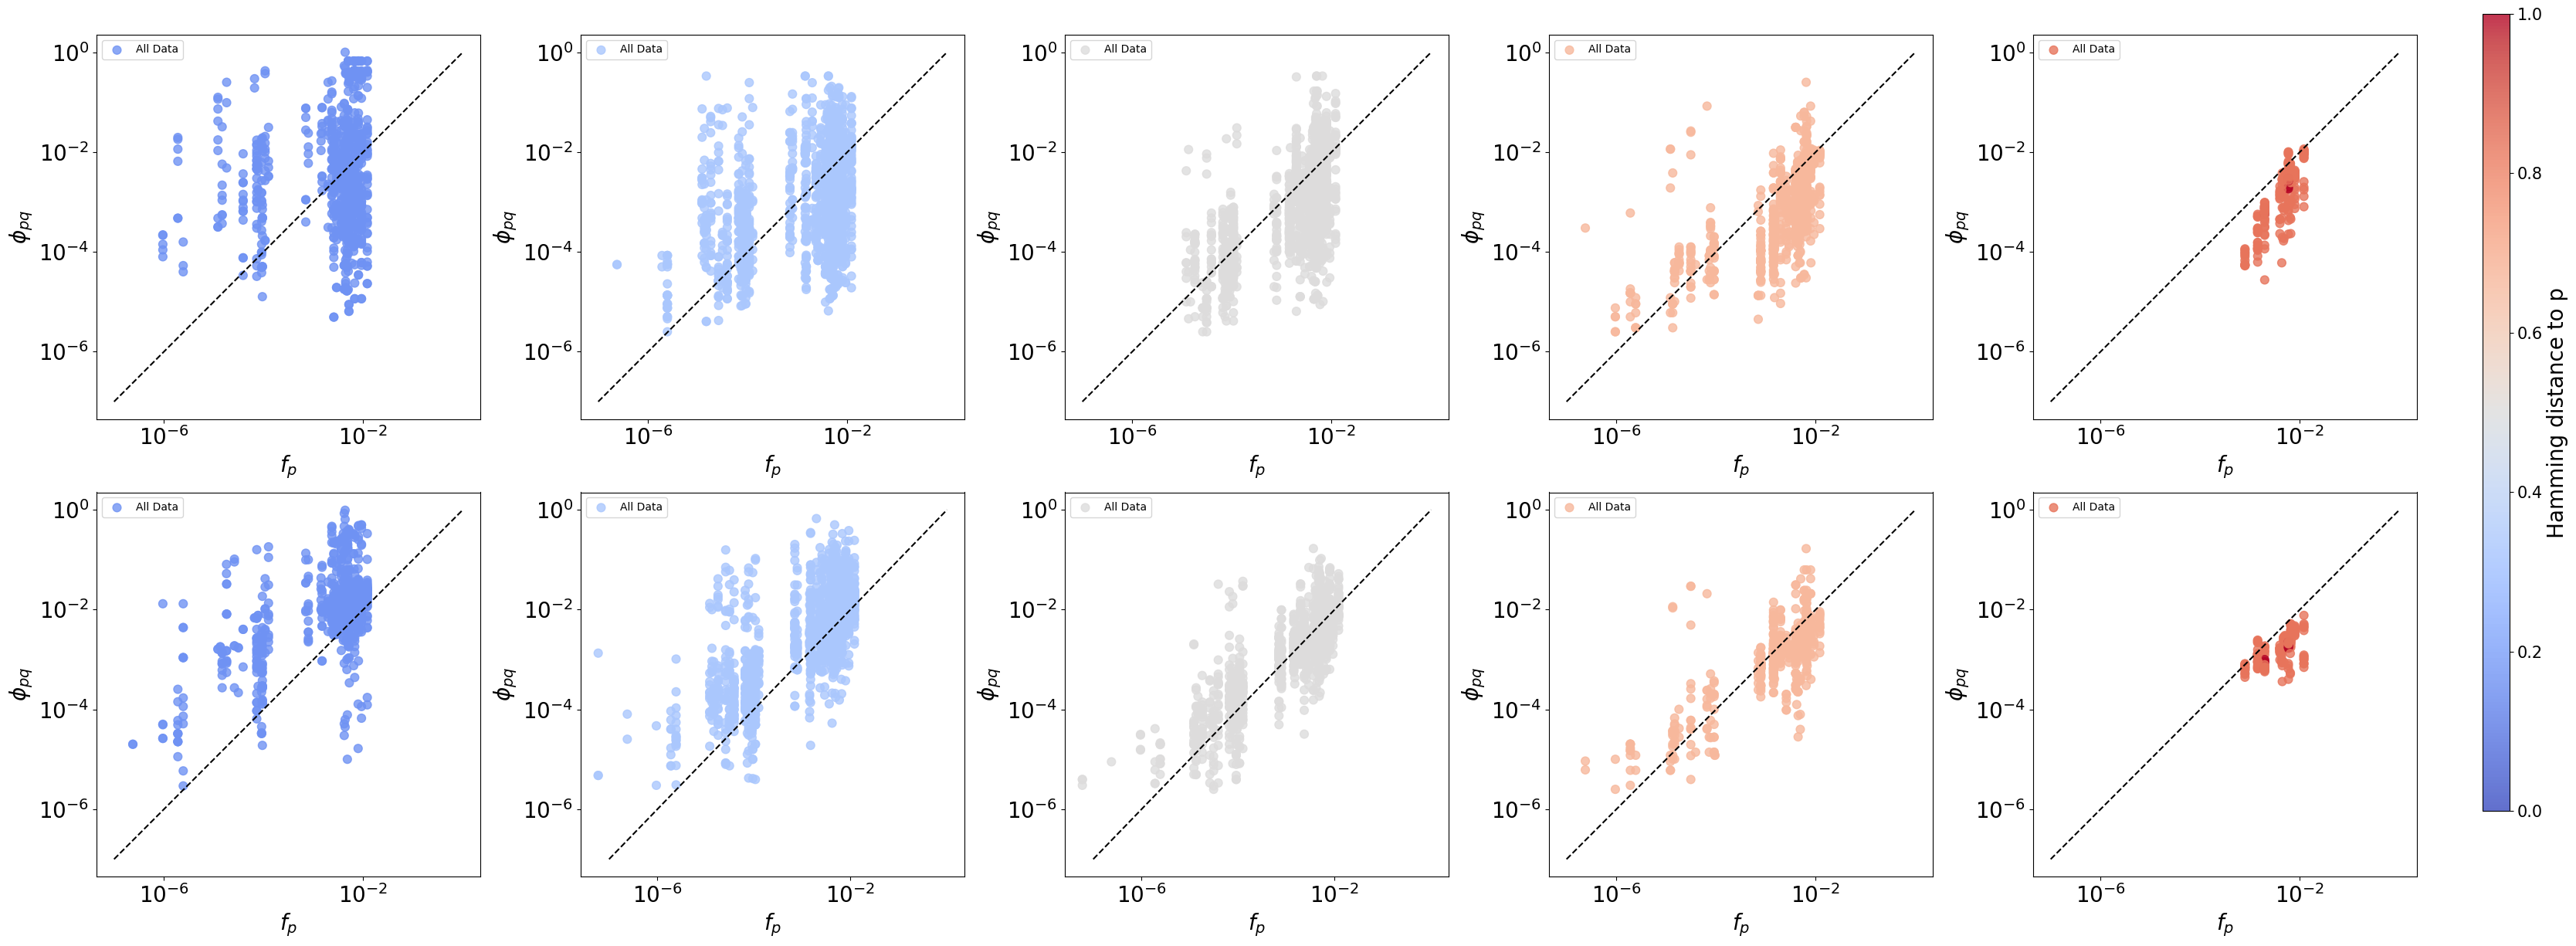

In [12]:


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(35,12))
gs = GridSpec(2, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]

# Nested lists for each site and index combination
site_idx_phipq = [[[] for _ in range(L)] for _ in range(5)]
site_idx_hamming = [[[] for _ in range(L)] for _ in range(5)]
site_idx_freq = [[[] for _ in range(L)] for _ in range(5)]
m = 4
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
        if i == 0: continue
    #if i > 0 and i < 28:
        sitehamming = [0]*12
        for s,vals in siteshammingmean[key].items():
            sitehamming[s] = vals
        
        sites_of_interest,max_value = find_global_maximum(sitehamming)
        for site in range(L):
            qitems = phipq_site[key][site]
            
            for q, phi in qitems.items():
                if q == '.'*L or q == key:
                    continue
                hamming_dist = hamming(key, q)
                listphipq.append(phi)
                listhamming.append(hamming_dist)
                listfreq.append(neutralsets[q+'\n'] / K**L)
            
                # Assign to appropriate range
                if hamming_dist < 4/12:
                    idx = 0
                elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                    idx = 1
                elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                    idx = 2
                elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                    idx = 3
                else:
                    idx = 4
           

                if  key[site] == '.':
                        site_idx_phipq[0][idx].append(phi)
                        site_idx_hamming[0][idx].append(hamming_dist)
                        site_idx_freq[0][idx].append(neutralsets[q+'\n'] / K**L)
                elif key[site] == '(' or key[site] == ')':
                    site_idx_phipq[1][idx].append(phi)
                    site_idx_hamming[1][idx].append(hamming_dist)
                    site_idx_freq[1][idx].append(neutralsets[q+'\n'] / K**L)
                #if site == sites_of_interest:
                #        site_idx_phipq[0][idx].append(phi/12.)
                #        site_idx_hamming[0][idx].append(hamming_dist)
                #        site_idx_freq[0][idx].append(neutralsets[q+'\n'] / K**L)
                #else:
                #        site_idx_phipq[1][idx].append(phi/12.)
                #       site_idx_hamming[1][idx].append(hamming_dist)
                #        site_idx_freq[1][idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    for k in range(2):
        ax = fig.add_subplot(gs[k, j])
        #if k == 0: ax.set_title(str(list(sort_neutralsets.keys())[m][j]), fontsize=40)
        scatter = ax.scatter(site_idx_freq[k][j], site_idx_phipq[k][j], s=60, c=site_idx_hamming[k][j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
        #scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.set_xlabel(r'$f_p$', fontsize=20)
        ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)
        axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..
(((....)))..


<Figure size 3500x1200 with 0 Axes>

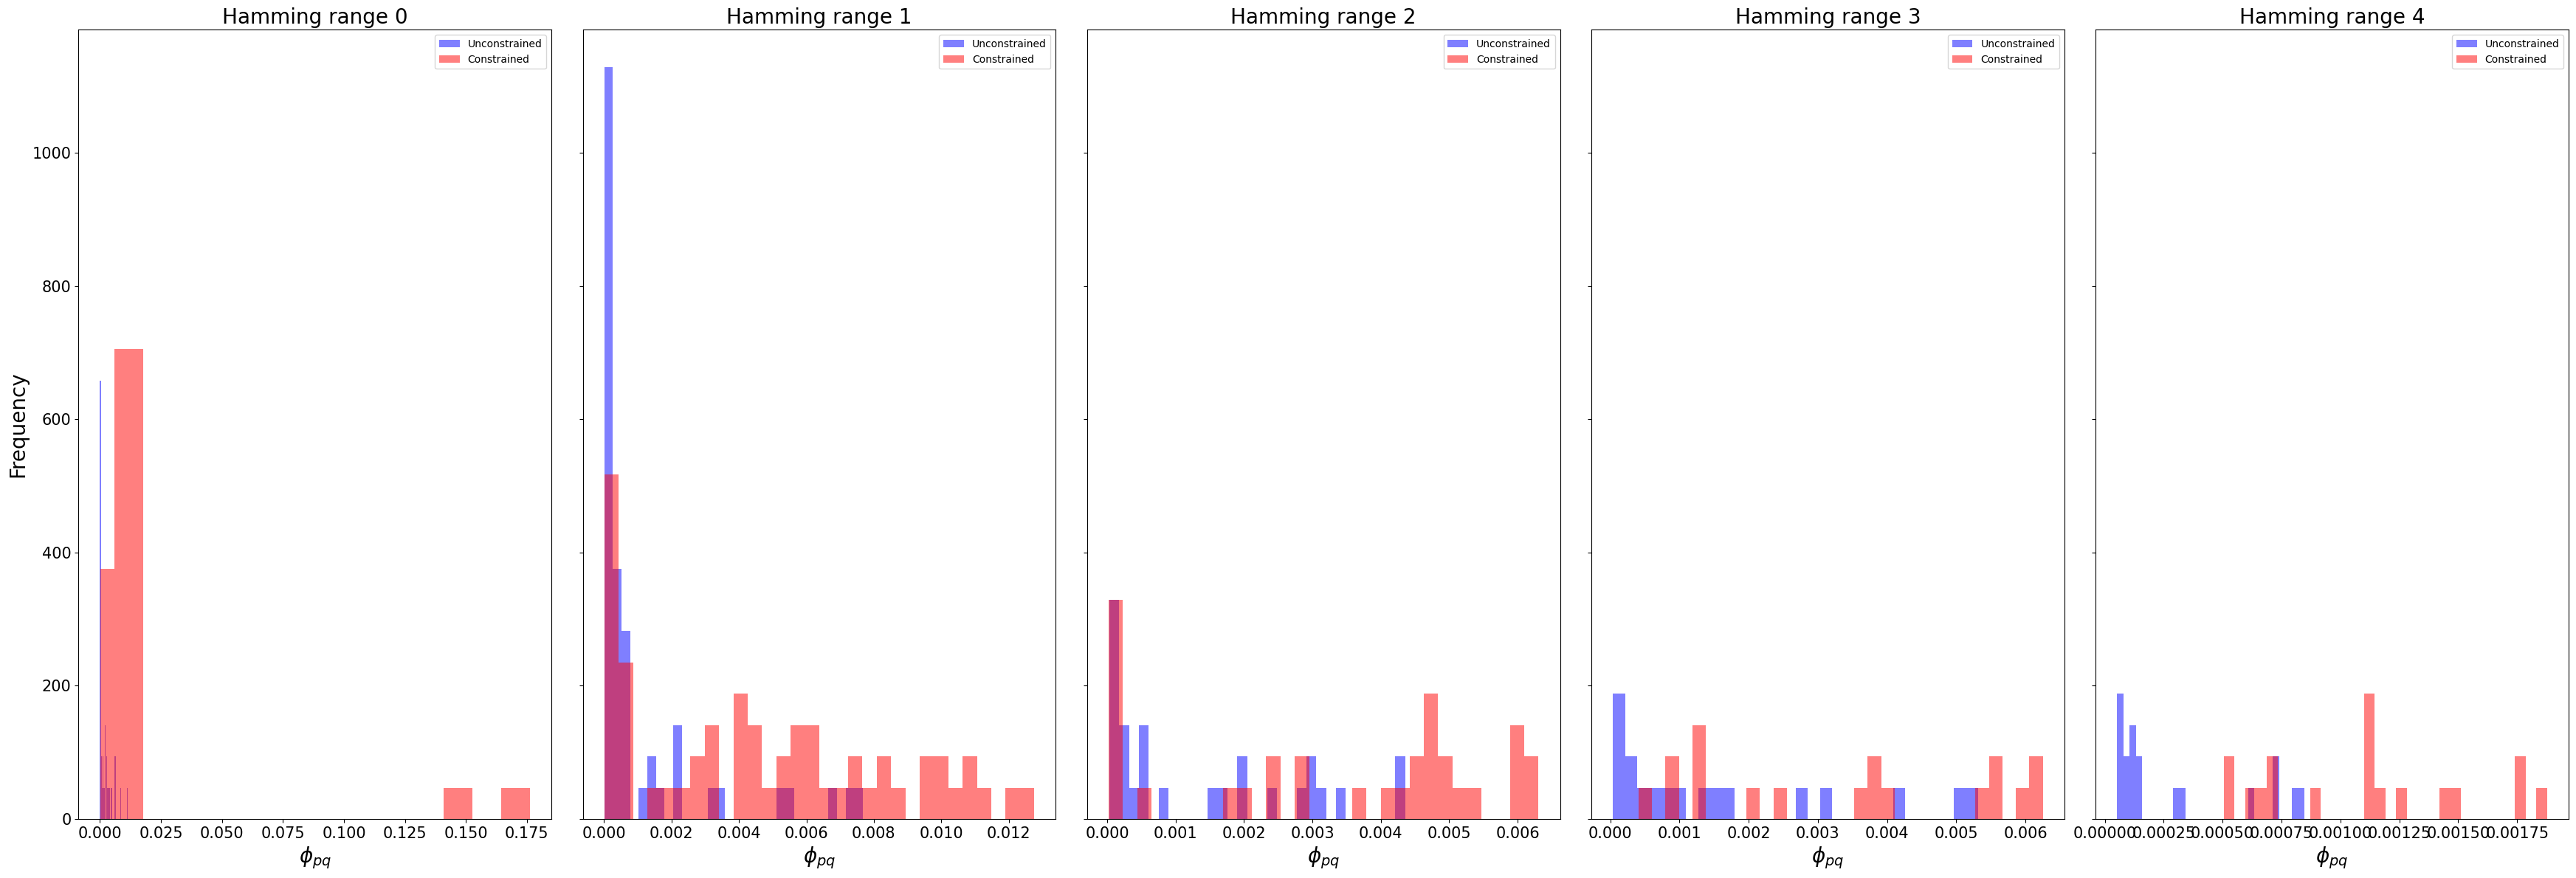

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(35,12))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]

# Nested lists for each site and index combination
site_idx_phipq_uc= [[] for _ in range(5)]
site_idx_hamming_uc = [[] for _ in range(5)]
site_idx_freq_uc = [[] for _ in range(5)]
site_idx_phipq_c = [[] for _ in range(5)]
site_idx_hamming_c = [[] for _ in range(5)]
site_idx_freq_c = [[] for _ in range(5)]

m = 4
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0: continue
    
    unconstrained_sites = []
    constrained_sites = []
    key = list(sort_neutralsets.keys())[1]
    print(key)
    for site in range(L):
        if key[site] == '.':
            unconstrained_sites.append(site)
        else: 
            constrained_sites.append(site)

    # Union of q values from all unconstrained sites
    unconstrained_qs = set()
    for site in unconstrained_sites:
        unconstrained_qs.update(q for q, phi in phipq_site[key][site].items())

    # Union of q values from all constrained sites
    constrained_qs = set()
    for site in constrained_sites:
        constrained_qs.update(q for q, phi in phipq_site[key][site].items())

    # Intersection of q values from unconstrained and constrained sites
    common_qs = unconstrained_qs.intersection(constrained_qs)

    for site in range(L):
        qitems = phipq_site[key][site]
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key or q not in common_qs:
                continue
            hamming_dist = hamming(key, q)
            listphipq.append(phi)
            listhamming.append(hamming_dist)
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
            # Assign to appropriate range
            if hamming_dist < 4/12:
                idx = 0
            elif hamming_dist < 6/12 and hamming_dist >= 4/12:
                idx = 1
            elif hamming_dist < 8/12 and hamming_dist >= 6/12:
                idx = 2
            elif hamming_dist < 10/12 and hamming_dist >= 8/12:
                idx = 3
            else:
                idx = 4

            if key[site] == '.':
                site_idx_phipq_uc[idx].append(phi)
                site_idx_hamming_uc[idx].append(hamming_dist)
                site_idx_freq_uc[idx].append(neutralsets[q+'\n'] / K**L)
            elif key[site] == '(' or key[site] == ')':
                site_idx_phipq_c[idx].append(phi)
                site_idx_hamming_c[idx].append(hamming_dist)
                site_idx_freq_c[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots

axes = []
fig, axes = plt.subplots(1, 5, figsize=(35, 12), sharey=True)

for j in range(5):
    ax = axes[j]
    ax.hist(site_idx_phipq_uc[j], bins=30, alpha=0.5, label='Unconstrained', color='blue')
    ax.hist(site_idx_phipq_c[j], bins=30, alpha=0.5, label='Constrained', color='red')
    ax.set_xlabel(r'$\phi_{pq}$', fontsize=20)
    ax.set_title(f'Hamming range {j}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    if j == 0:
        ax.set_ylabel('Frequency', fontsize=20)
    ax.legend()

plt.tight_layout()
plt.savefig("phipq_distribution_comparison.png", bbox_inches='tight')
plt.show()

In [18]:
unconstrained_sites = []
constrained_sites = []
key = list(sort_neutralsets.keys())[1]
print(key)
for site in range(L):

    if key[site] == '.':
        unconstrained_sites.append(site)
    else: 
        constrained_sites.append(site)

# Union of q values from all unconstrained sites
unconstrained_qs = set()
for site in unconstrained_sites:
    unconstrained_qs.update(q for q, phi in phipq_site[key][site].items())

# Union of q values from all constrained sites
constrained_qs = set()
for site in constrained_sites:
    constrained_qs.update(q for q, phi in phipq_site[key][site].items())

# Intersection of q values from unconstrained and constrained sites
common_qs = unconstrained_qs.intersection(constrained_qs)

# common_qs now contains the q values present in both unconstrained and constrained sites


(((....)))..
Common q values in both unconstrained and constrained sites: {'.((.(...).))', '..((....))..', '...((.....))', '(.((....))).', '((((....))))', '((((...)))).', '((....))....', '...((....)).', '(((.....))).', '..(((...))).', '..((.....)).', '((.(....))).', '............', '..((......))', '.((.....))..', '(((......)))', '((.....))...', '(.((....)).)', '(((....)))..', '.(((.....)))', '...(((...)))', '((......))..', '.((....))...', '....((....))', '.((......)).', '.(((...)))..', '.((((...))))', '(((...)))...', '.(((....))).', '((.......)).', '..(((....)))', '((.(....).))'}


In [14]:
key

'(..(....)..)'

In [ ]:
site_idx_phipq_uc

## correlations


((.(...).)).
(.(....).)..
.(.(....).).
((((...)).))
(.(.....).).
((.((...))))
.(.((...)).)
.((.(...).))
.(((....).))
.((.(....)))
(((....)).).
..(.(....).)
(..(....)..)


/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value e

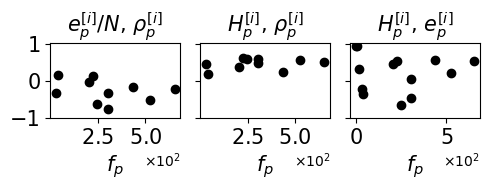

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict, OrderedDict
import functools
from matplotlib.ticker import ScalarFormatter

# Initialize variables
freq = []
corr_er_uc = []
corr_er_c = []
corr_er_in = []
corr_er = []
corr_hr_uc = []
corr_hr_c = []
corr_hr_in = []
corr_hr = []
corr_he_uc = []
corr_he_c = []
corr_he_in = []
corr_he = []
dataevolvabilitytott = []
datarobustnesstott = []
siteshamming = []
sitesminev = defaultdict(int)
datarobustpheno = defaultdict(float)


listneutralsets = list(sort_neutralsets.keys())
param= 2 #print range of neutral space size
params = {
    5: listneutralsets[1:8], 
    4: listneutralsets[8:(8+20)],
    3: listneutralsets[(8+20):(8+20+7)],
    2: listneutralsets[(8+20+7):]
}
listneutralsets = params[param]
for key in listneutralsets:
    print(key)
    sitesum = 0
    dataevolvability_uc = []
    datarobustness_uc = []
    siteshamming_uc = []
    dataevolvability_c = []
    datarobustness_c = []
    siteshamming_c = []
    dataevolvability_in = []
    datarobustness_in = []
    siteshamming_in = []
    dataevolvability = []
    datarobustness = []
    siteshamming = []
    datarobustnesstot = []
    for site in range(12):
            dictsymbols = Counter(key)  # Count the number of symbols at each site
            #if sitesum >= dictsymbols['(']:
            #    siteshamming_in.append(avgs / edgeD_nodel[key][site])
            #    dataevolvability_in.append(phenos_site_evol[key][site] / (len(sort_neutralsets) - 1))  # Fractional evolvability
            #    datarobustness_in.append(phenos_site_robust[key][site] / edge_site_robust[key])  # Fractional robustness
            # if key[site] == '.':
            #     siteshamming_uc.append(siteshammingmean[key][site])
            #     dataevolvability_uc.append(sitesevolvability[key][site])  # Fractional evolvability
            #     datarobustness_uc.append(sitesrobustness[key][site])
            #     sitesum += 0
            # elif key[site] == '(':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum += 1
            # elif key[site] == ')':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum -= 1
        
            siteshamming.append(siteshammingmean[key][site])
            dataevolvability.append(sitesevolvability[key][site])  # Fractional evolvability
            datarobustness.append(sitesrobustness[key][site])  # Fractional robustness
    
    corr_er_uc.append(np.corrcoef(datarobustness_uc, dataevolvability_uc)[0, 1])
    corr_er_c.append(np.corrcoef(datarobustness_c, dataevolvability_c)[0, 1])
    corr_er_in.append(np.corrcoef(datarobustness_in, dataevolvability_in)[0, 1])
    corr_er.append(np.corrcoef(datarobustness, dataevolvability)[0, 1])
    corr_hr_uc.append(np.corrcoef(siteshamming_uc, datarobustness_uc)[0, 1])
    corr_hr_c.append(np.corrcoef(siteshamming_c, datarobustness_c)[0, 1])
    corr_hr_in.append(np.corrcoef(siteshamming_in, datarobustness_in)[0, 1])
    corr_hr.append(np.corrcoef(siteshamming, datarobustness)[0, 1])
    corr_he_uc.append(np.corrcoef(siteshamming_uc, dataevolvability_uc)[0, 1])
    corr_he_c.append(np.corrcoef(siteshamming_c, dataevolvability_c)[0, 1])
    corr_he_in.append(np.corrcoef(siteshamming_in, dataevolvability_in)[0, 1])
    corr_he.append(np.corrcoef(siteshamming, dataevolvability)[0, 1])
    freq.append(sort_neutralsets[key])

#phenotype evolvability and robustness
#dataevolvabilitytott = []
#datarobustnesstott = []
#for pheno in evolvtot.keys():
#    dataevolvabilitytott.append(evolvtot[pheno])
#    datarobustnesstott.append(datarobustpheno[pheno])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(5, 2), sharey=True)

# Collect handles and labels for the legend
handles, labels = [], []

# Plot the first subplot
#scatter1 = axs[0].scatter(freq, corr_er_uc, color='black', label=r'unconstrained')
#scatter2 = axs[0].scatter(freq, corr_er_c, color='blue', label=r'constrained')
#scatter3 = axs[0].scatter(freq, corr_er_in, color='green', label=r'(x) unconstrained only')
scatter4 = axs[0].scatter(freq, corr_er, color='black', label=r'all sites')
#axs[0].set_xscale('log')
axs[0].set_xlabel('$f_p$', fontsize=15)
#axs[0].set_ylabel(r'Pearson $r$', fontsize=15)
axs[0].set_title(r'$e_p^{[i]}/N$, $\rho_p^{[i]}$', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

# Plot the second subplot
#axs[1].scatter(freq, corr_hr_uc, color='black', label=r'hr_uc')
#axs[1].scatter(freq, corr_hr_c, color='blue', label=r'hr_c')
#axs[1].scatter(freq, corr_hr_in, color='green', label=r'hr_in')
axs[1].scatter(freq, corr_hr, color='black', label=r'hr')
#axs[1].set_xscale('log')
#axs[1].set_ylabel(r'Pearson $r$', fontsize=15)
axs[1].set_xlabel('$f_p$', fontsize=15)
axs[1].set_title(r'$H_p^{[i]}$, $\rho_p^{[i]}$', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

# Plot the third subplot
#axs[2].scatter(freq, corr_he_uc, color='black', label=r'he_uc', marker='o')
#axs[2].scatter(freq, corr_he_c, color='blue', label=r'he_c')
#axs[2].scatter(freq, corr_he_in, color='green', label=r'he_in', marker='o')
axs[2].scatter(freq, corr_he, color='black', label=r'he')
#axs[2].set_xscale('log')
axs[2].set_xlabel('$f_p$', fontsize=15)
axs[2].set_title(r'$H_p^{[i]}$, $e_p^{[i]}$', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)

# Collect handles and labels from the plots
#handles.extend([scatter1, scatter2, scatter3, scatter4])
#handles.extend([scatter1, scatter2, scatter4])
#handles.extend([scatter1, scatter2])
#labels.extend([scatter1.get_label(), scatter2.get_label(), scatter3.get_label(), scatter4.get_label()])
#labels.extend([scatter1.get_label(), scatter2.get_label()])

# Format x-ticks in scientific notation
for ax in axs:
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.xaxis.get_major_formatter().set_powerlimits((0, 0))
    ax.set_yticks([1.0, 0.0, -1.0])

# Add a legend for the entire figure at the bottom with two rows
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=15)

# Show the plot
plt.tight_layout()
plt.savefig("correlationstot"+str(param)+".png", bbox_inches='tight')
plt.show()

# Prediction of largest jump?


In [7]:
from collections import Counter
from collections import defaultdict
import functools
phenosminev = defaultdict(functools.partial(defaultdict, list))
for pheno, phenos in phenos_site_nodel.items():
    for site, site_phenos in phenos.items():
        if site == sitesminev[pheno]:
            phenosminev[pheno][site] = list(dict(Counter(site_phenos)).keys())

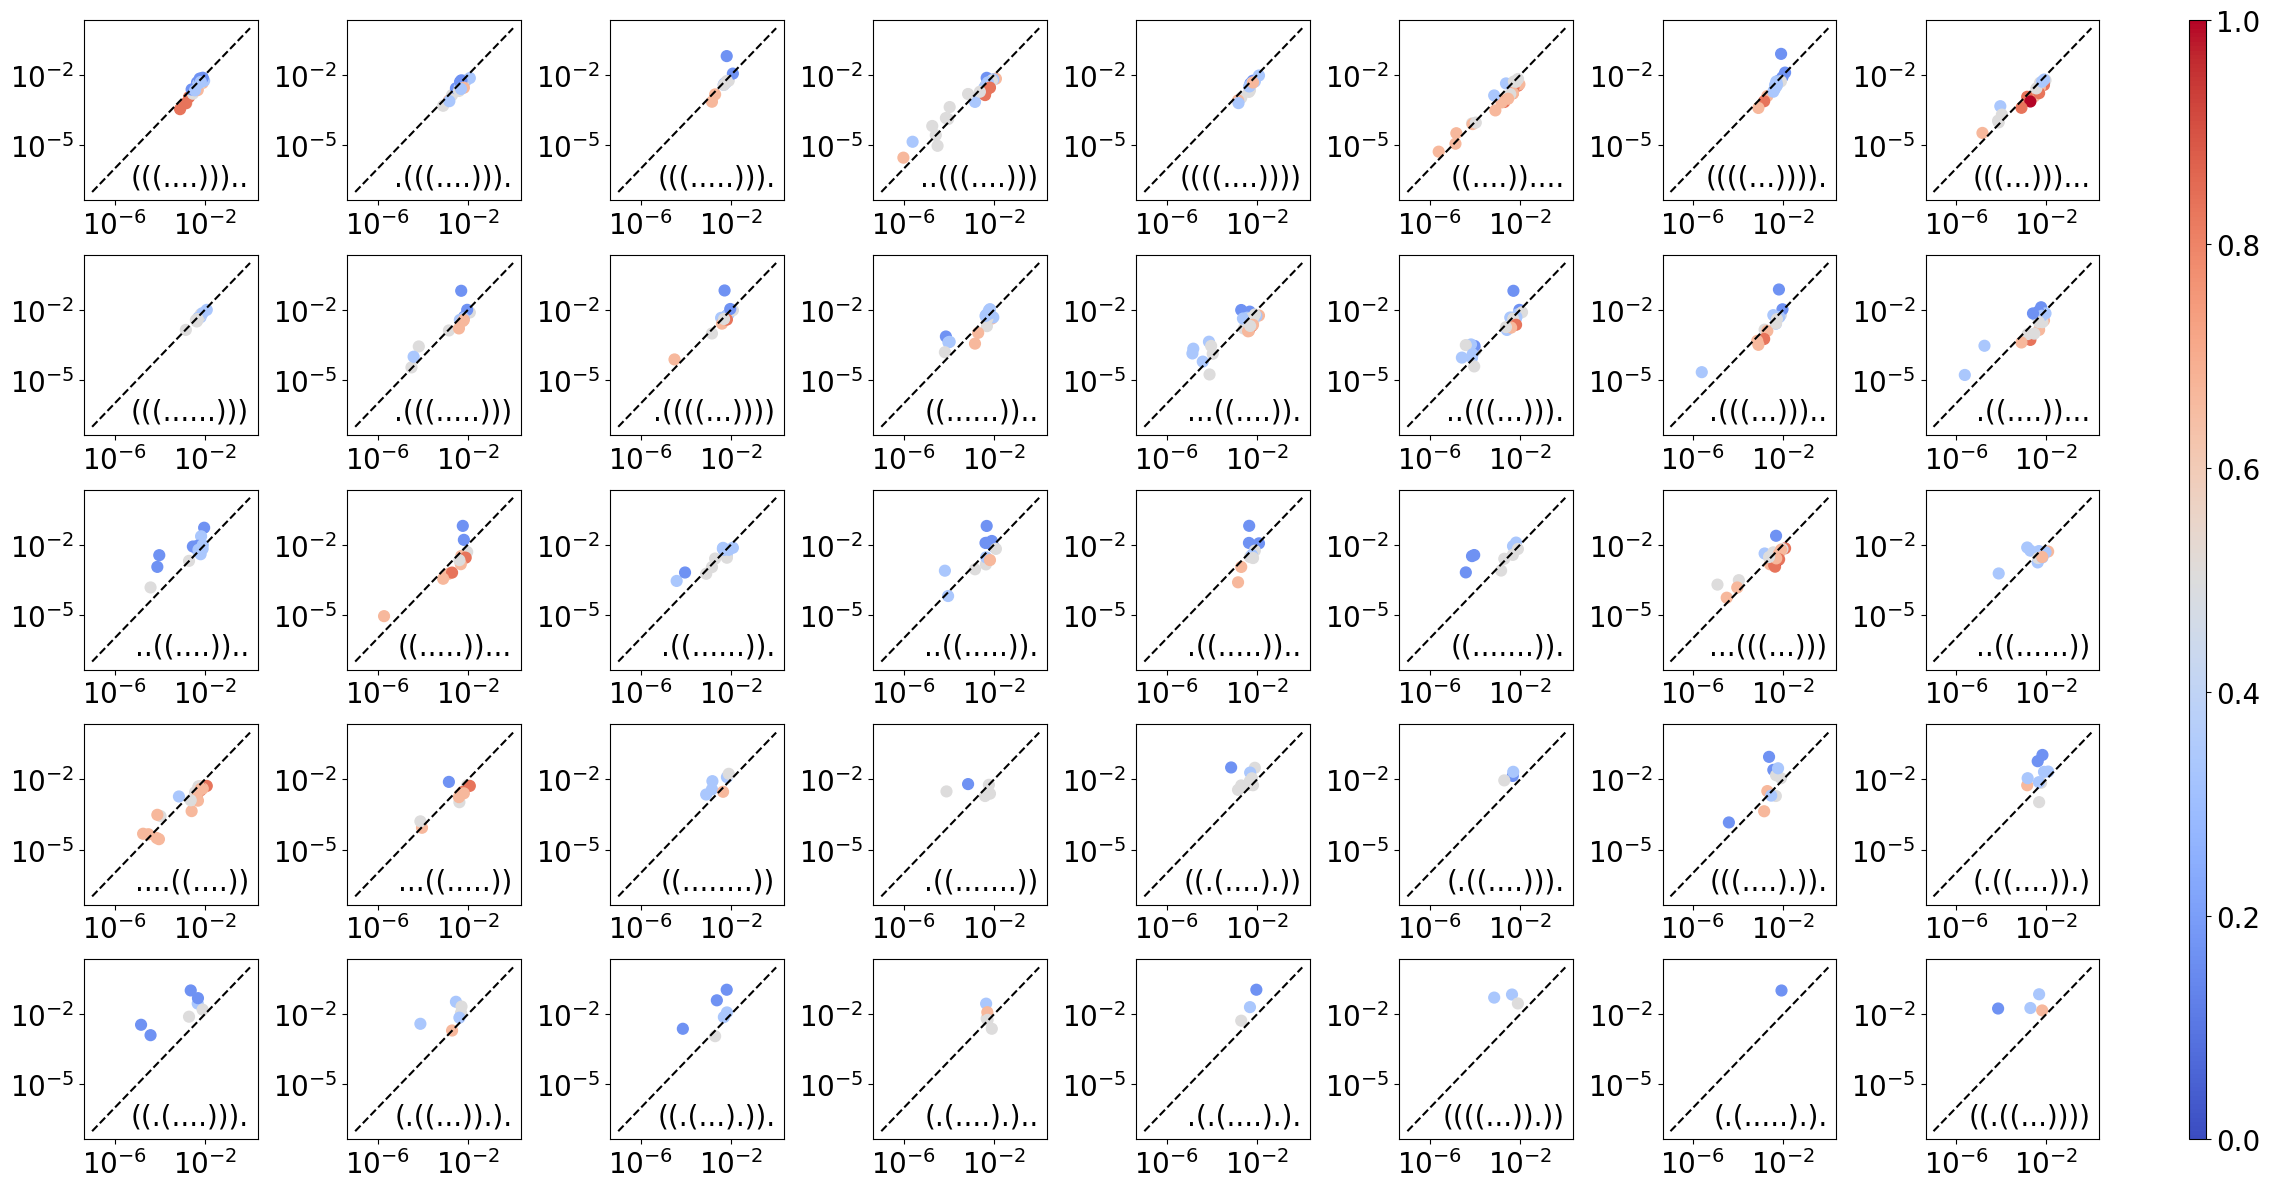

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(5, 9, figure=fig, width_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 0.1])

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

axs = [fig.add_subplot(gs[i, j]) for i in range(5) for j in range(8)]

for i, ax in enumerate(axs):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listhamming = []
        listfreq = []
        
        for q, phi in qitems.items():
            if q in phenosminev[key][sitesminev[key]]:  # Skip the neutral set and the del sequence
                listphipq.append(phi)
                listhamming.append(hamming(key, q))
                listfreq.append(neutralsets[q+'\n'] / K**L)
        
        scatter = ax.scatter(listfreq, listphipq, s=60, c=listhamming, cmap=cmap, norm=norm, alpha=1)  # Use the colormap to determine the color

        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.text(0.95, 0.05, key, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)  # Set tick label size

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_subplot(gs[:, -1])  # Create an axis for the colorbar
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the colorbar
plt.savefig("phipq.png", bbox_inches='tight')
plt.show()

# Compare site to phentoype phipq to see 

/tmp/ipykernel_4024508/149494125.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


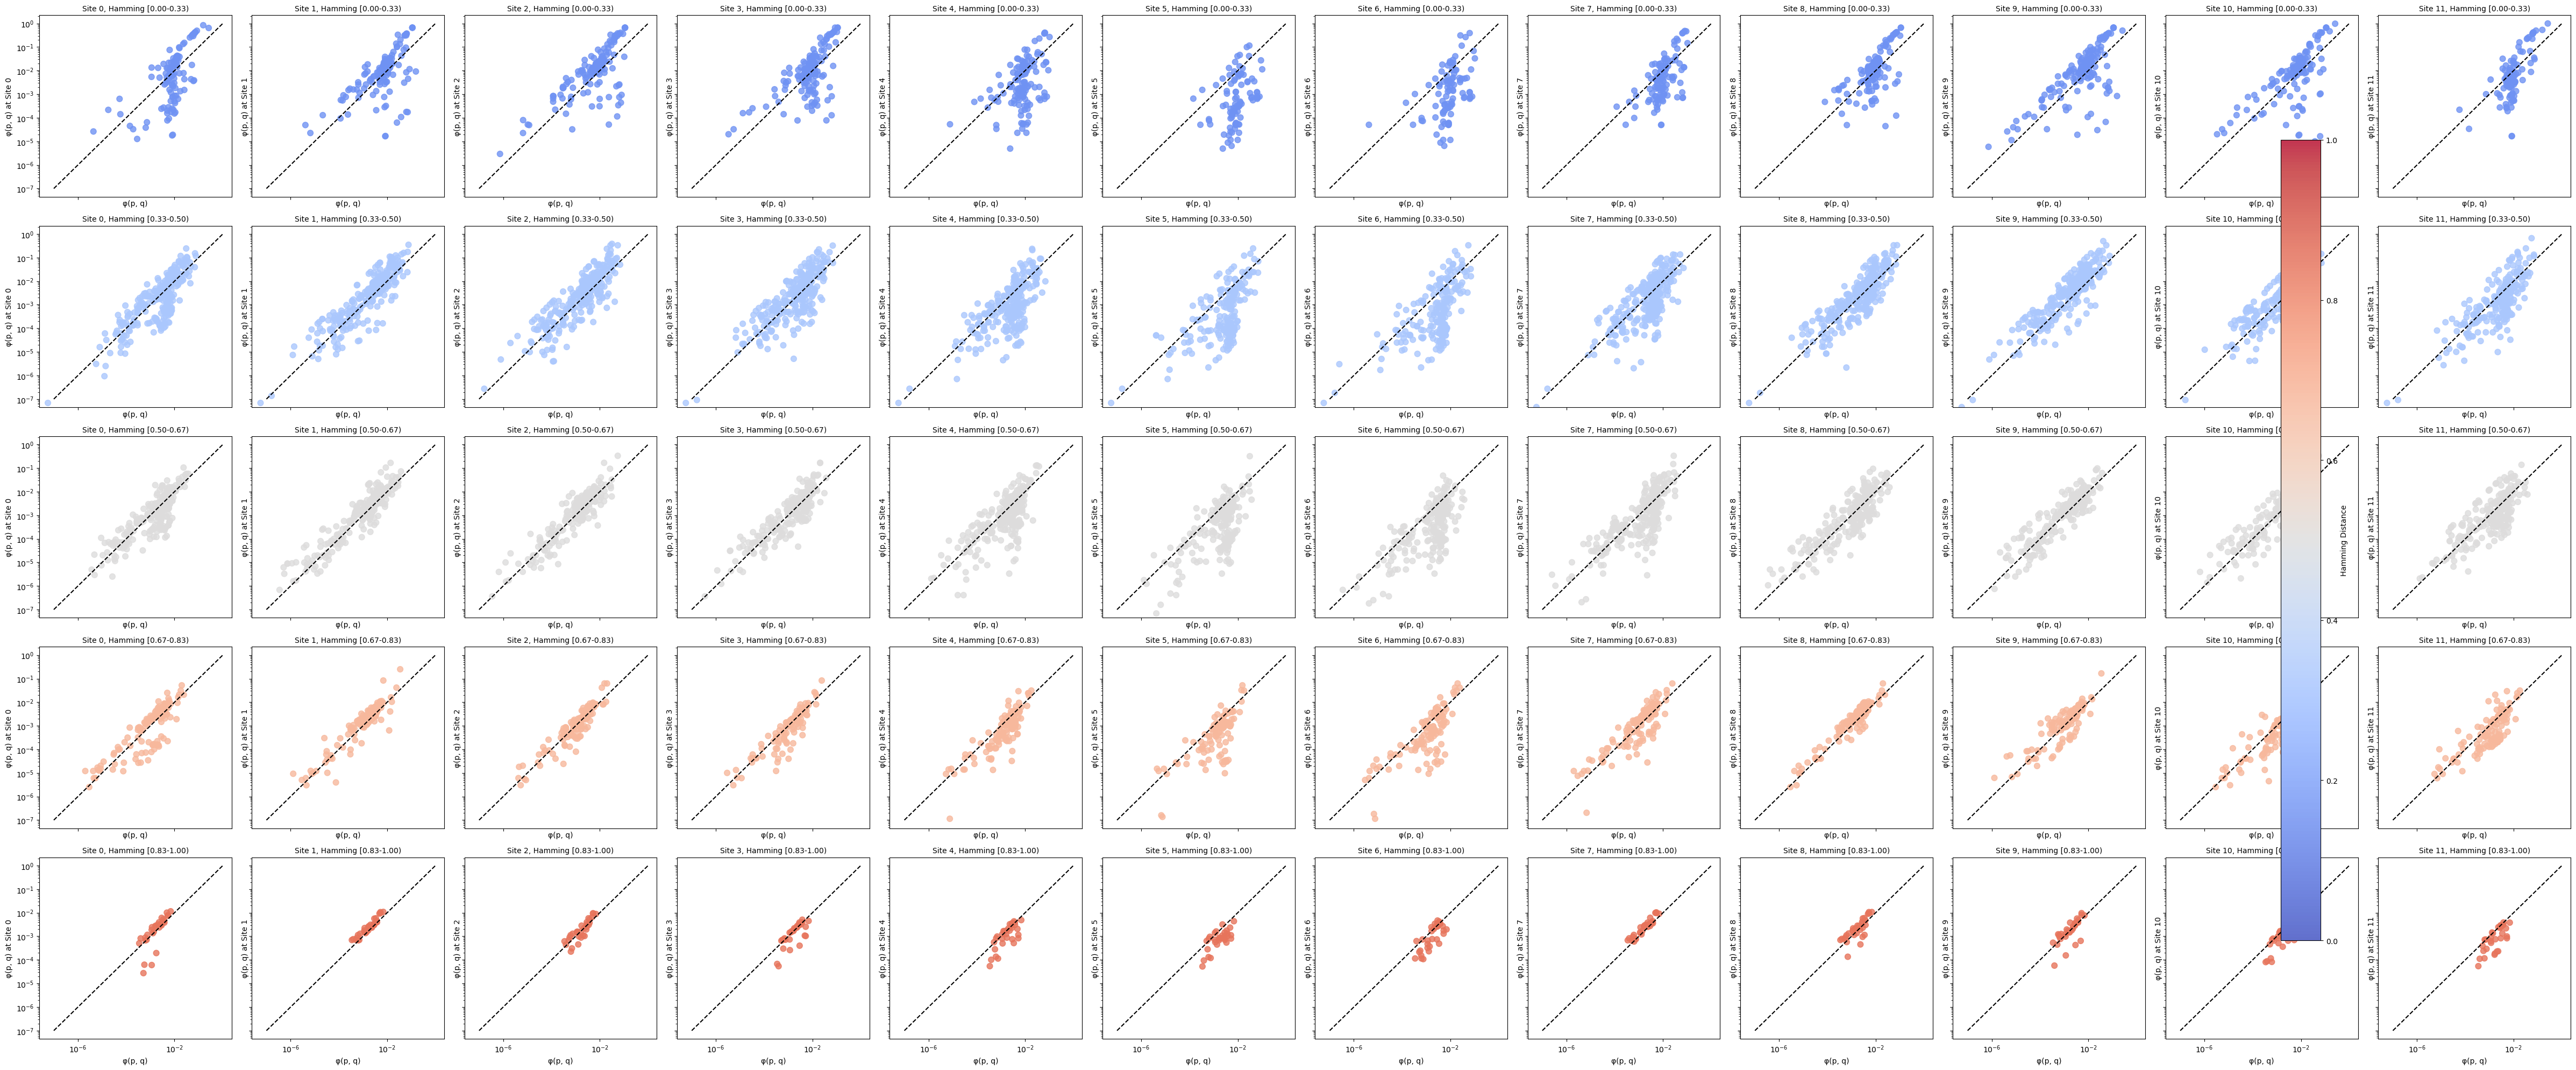

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Define colormap
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

# Define ranges of Hamming distance
hamming_ranges = [(0, 4/12), (4/12, 6/12), (6/12, 8/12), (8/12, 10/12), (10/12, 1)]
num_sites = L  # Assuming L is defined in your script

# Prepare figure layout
fig, axes = plt.subplots(len(hamming_ranges), num_sites, figsize=(num_sites * 4, len(hamming_ranges) * 4), sharex=True, sharey=True)

# Process data
for i, (h_min, h_max) in enumerate(hamming_ranges):  # Row index: Hamming range
    for site in range(num_sites):  # Column index: Site
        ax = axes[i, site]
        phipq_values = []
        phipq_site_values = []
        hamming_values = []

        # Iterate over keys
        for key in sort_neutralsets.keys():
            for q, phi in phipq[key].items():
                if q == '.' * L or q == key:
                    continue
                
                hamming_dist = hamming(key, q)
                if h_min <= hamming_dist < h_max:
                    phipq_values.append(phi)
                    phipq_site_values.append(phipq_site[key][site].get(q, 0))
                    hamming_values.append(hamming_dist)

        # Scatter plot
        sc = ax.scatter(phipq_values, phipq_site_values, c=hamming_values, cmap=cmap, norm=norm, alpha=0.8, s=60)
        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.set_title(f"Site {site}, Hamming [{h_min:.2f}-{h_max:.2f})", fontsize=10)
        ax.set_xlabel("φ(p, q)")
        ax.set_ylabel(f"φ(p, q) at Site {site}")

# Add colorbar
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label="Hamming Distance")

plt.tight_layout()
plt.show()